# Sentiment Analysis 


## Dataset Source
https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style ='whitegrid')
import re
import nltk
from nltk.corpus import wordnet, stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

## Importing the Data

In [2]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0)

In [3]:
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [4]:
df.tail()

Clothing ID  Age                                              Title  \
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


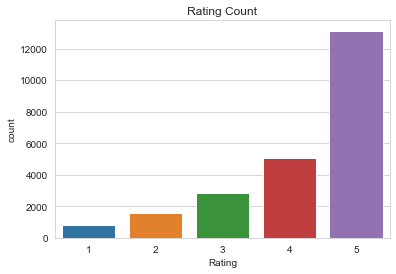

In [6]:
sns.countplot(df['Rating'])
plt.title('Rating Count')
plt.show()

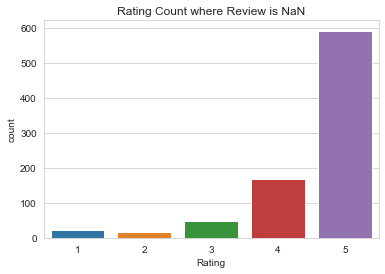

In [7]:
sns.countplot(df['Rating'][df['Review Text'].isna()])
plt.title('Rating Count where Review is NaN')
plt.show()

In [8]:
a = pd.DataFrame(df['Rating'][df['Review Text'].isna()].value_counts())
a.rename({'Rating' : 'Rating_no_review'}, inplace=True, axis=1)
b = df['Rating'].value_counts()
compare = pd.concat([a, b], axis=1)
compare['Percentage of No Review'] = (compare['Rating_no_review'] / compare['Rating'])*100
compare['Percentage of No Review Itself'] = (compare['Rating_no_review'] / len(df[df['Review Text'].isna()])*100)
compare['Percentage Rating Overall'] = (compare['Rating'] / len(df)*100)
compare

Rating_no_review  Rating  Percentage of No Review  \
1                21     842                 2.494062   
2                16    1565                 1.022364   
3                48    2871                 1.671891   
4               169    5077                 3.328737   
5               591   13131                 4.500800   

   Percentage of No Review Itself  Percentage Rating Overall  
1                        2.485207                   3.585115  
2                        1.893491                   6.663544  
3                        5.680473                  12.224304  
4                       20.000000                  21.617134  
5                       69.940828                  55.909904

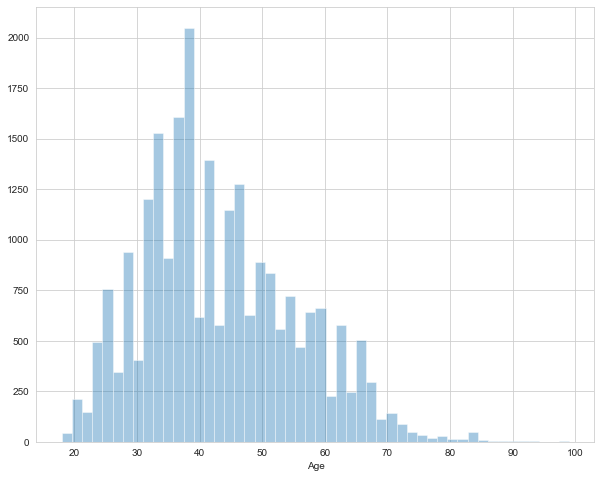

In [9]:
plt.figure(figsize=(10,8))
sns.distplot(df['Age'], kde=False)
plt.show()

In [10]:
df[['Age', 'Rating']].groupby('Rating').mean()

Age
Rating           
1       43.693587
2       42.622364
3       42.158481
4       42.887532
5       43.583124

In [11]:
bins = pd.IntervalIndex.from_tuples([(16,30),(31,45), (46,60), (61,75), (76,90)])
df[['Rating']].groupby(pd.cut(df['Age'], bins)).mean()

Rating
Age               
(16, 30]  4.192331
(31, 45]  4.178011
(46, 60]  4.218797
(61, 75]  4.274596
(76, 90]  4.486111

In [12]:
df[['Division Name', 'Rating']].groupby('Division Name').mean().sort_values(by='Rating',ascending=False)

Rating
Division Name           
Initmates       4.286285
General Petite  4.211084
General         4.176606

In [13]:
df[['Department Name', 'Rating']].groupby('Department Name').mean().sort_values(by='Rating',ascending=False)

Rating
Department Name          
Bottoms          4.288760
Intimate         4.280115
Jackets          4.264535
Tops             4.172239
Dresses          4.150815
Trend            3.815126

In [14]:
df[['Class Name', 'Rating']].groupby('Class Name').mean().sort_values(by='Rating',ascending=False)

Rating
Class Name              
Casual bottoms  4.500000
Layering        4.376712
Jeans           4.360942
Lounge          4.301013
Jackets         4.295455
Sleep           4.285088
Intimates       4.279221
Legwear         4.278788
Pants           4.265850
Fine gauge      4.260909
Shorts          4.255521
Skirts          4.245503
Outerwear       4.198171
Swim            4.197143
Sweaters        4.179272
Knits           4.161677
Blouses         4.154020
Dresses         4.150815
Chemises        4.000000
Trend           3.815126

In [15]:
df_sentiment = df.copy()
df_sentiment = df_sentiment[['Title', 'Review Text', 'Rating']]
df_sentiment.rename(columns={'Rating' : 'Sentiment'}, inplace=True)

df_sentiment['Sentiment'] = df_sentiment['Sentiment'].map({1 : 'Negative', 2 : 'Negative', 3 : 'Neutral', 4 : 'Positive', 5 : 'Positive'})

In [16]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        19676 non-null  object
 1   Review Text  22641 non-null  object
 2   Sentiment    23486 non-null  object
dtypes: object(3)
memory usage: 733.9+ KB


In [17]:
df_sentiment = df_sentiment[~df_sentiment['Review Text'].isna()]

In [18]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        19675 non-null  object
 1   Review Text  22641 non-null  object
 2   Sentiment    22641 non-null  object
dtypes: object(3)
memory usage: 707.5+ KB


In [19]:
df_sentiment.describe()

Title                                        Review Text Sentiment
count      19675                                              22641     22641
unique     13992                                              22634         3
top     Love it!  Perfect fit and i've gotten so many compliment...  Positive
freq         136                                                  3     17448

In [20]:
df_sentiment.drop_duplicates(subset='Review Text', inplace=True)

In [21]:
df_sentiment.describe()

Title                                        Review Text Sentiment
count      19669                                              22634     22634
unique     13991                                              22634         3
top     Love it!  The cut is brilliant-the wash is subtle-the we...  Positive
freq         136                                                  1     17442

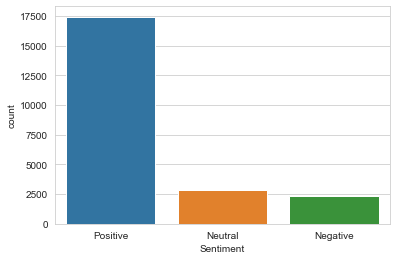

In [22]:
sns.countplot(df_sentiment['Sentiment'])
plt.show()

In [23]:
pct_pos = (len(df_sentiment[df_sentiment['Sentiment'] == 'Positive'])/len(df_sentiment)*100)
pct_neut = (len(df_sentiment[df_sentiment['Sentiment'] == 'Neutral'])/len(df_sentiment)*100)
pct_neg = (len(df_sentiment[df_sentiment['Sentiment'] == 'Negative'])/len(df_sentiment)*100)

print('Percentage of Positive : {:.2f}%'.format(pct_pos))
print('Percentage of Neutral : {:.2f}%'.format(pct_neut))
print('Percentage of Negative : {:.2f}%'.format(pct_neg))

Percentage of Positive : 77.06%
Percentage of Neutral : 12.47%
Percentage of Negative : 10.47%


In [24]:
a = pd.DataFrame(df_sentiment['Sentiment'][df_sentiment['Title'].isna()].value_counts())
a.rename({'Sentiment' : 'Sentiment_no_title'}, inplace=True, axis=1)
b = df_sentiment['Sentiment'].value_counts()
compare = pd.concat([a, b], axis=1)
compare['Percentage'] = (compare['Sentiment_no_title'] / compare['Sentiment'])*100

In [25]:
compare

Sentiment_no_title  Sentiment  Percentage
Positive                2287      17442   13.112028
Neutral                  359       2823   12.716968
Negative                 319       2369   13.465597

In [26]:
df_sentiment = df_sentiment[~df_sentiment['Title'].isna()]
df_sentiment.shape

(19669, 3)

In [27]:
pct_pos = (len(df_sentiment[df_sentiment['Sentiment'] == 'Positive'])/len(df_sentiment)*100)
pct_neut = (len(df_sentiment[df_sentiment['Sentiment'] == 'Neutral'])/len(df_sentiment)*100)
pct_neg = (len(df_sentiment[df_sentiment['Sentiment'] == 'Negative'])/len(df_sentiment)*100)

print('Percentage of Positive : {:.2f}%'.format(pct_pos))
print('Percentage of Neutral : {:.2f}%'.format(pct_neut))
print('Percentage of Negative : {:.2f}%'.format(pct_neg))

Percentage of Positive : 77.05%
Percentage of Neutral : 12.53%
Percentage of Negative : 10.42%


In [28]:
df_length = pd.DataFrame()

In [29]:
df_sentiment['Title'] = df_sentiment['Title'].astype('str')
df_sentiment['Review Text'] = df_sentiment['Review Text'].astype('str')
df_length['Title_char_length'] = df_sentiment['Title'].apply(lambda x: len(x))
df_length['Review_char_length'] = df_sentiment['Review Text'].apply(lambda x: len(x))
df_length['Title_word_length'] = df_sentiment['Title'].apply(lambda x: len(x.split()))
df_length['Review_word_length'] = df_sentiment['Review Text'].apply(lambda x: len(x.split()))

df_length['Sentiment'] = df_sentiment['Sentiment'].copy()

In [30]:
def clean(data):    
    data = re.sub('[^a-zA-Z]', ' ', data)
    words = data.lower()
    return words

def clean_stem(data):    
    data = re.sub('[^a-zA-Z]', ' ', data)
    words = data.lower().split()
    stops = set(stopwords.words('english'))
    remove_stopwords = [w for w in words if not w in stops]
    stemmer = SnowballStemmer('english')
    stemmed = [stemmer.stem(word) for word in remove_stopwords]
    words = [word for word in stemmed if len(word) > 1]
    cleaned = ' '.join(words)
    return cleaned

def get_wordnet_pos(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:                    
        return None
    
def clean_lemma(data):
    data = re.sub('[^a-zA-Z]', ' ', data)
    words = data.lower().split()
    stops = set(stopwords.words('english'))
    remove_stopwords = [w for w in words if not w in stops]
    sentence = ' '.join(remove_stopwords)
    lemmatizer = WordNetLemmatizer()
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wn_tagged = map(lambda x: (x[0], get_wordnet_pos(x[1])), nltk_tagged)
    lemmatized = []
    for word, tag in wn_tagged:
        if tag is None:
            lemmatized.append(word)
        else:
            lemmatized.append(lemmatizer.lemmatize(word, tag))
    words = [word for word in lemmatized if len(word) > 1]
    cleaned = ' '.join(words)
    return cleaned

In [31]:
df_sentiment['alpha_title'] = df_sentiment['Title'].apply(clean)
df_sentiment['alpha_review'] = df_sentiment['Review Text'].apply(clean)
df_sentiment['stem_title'] = df_sentiment['Title'].apply(clean_stem)
df_sentiment['stem_review'] = df_sentiment['Review Text'].apply(clean_stem)
df_sentiment['lemma_title'] = df_sentiment['Title'].apply(clean_lemma)
df_sentiment['lemma_review'] = df_sentiment['Review Text'].apply(clean_lemma)

In [32]:
df_sentiment.head()

Title                                        Review Text  \
2  Some major design flaws  I had such high hopes for this dress and reall...   
3         My favorite buy!  I love, love, love this jumpsuit. it's fun, fl...   
4         Flattering shirt  This shirt is very flattering to all due to th...   
5  Not for the very petite  I love tracy reese dresses, but this one is no...   
6     Cagrcoal shimmer fun  I aded this in my basket at hte last mintue to...   

  Sentiment              alpha_title  \
2   Neutral  some major design flaws   
3  Positive         my favorite buy    
4  Positive         flattering shirt   
5  Negative  not for the very petite   
6  Positive     cagrcoal shimmer fun   

                                        alpha_review            stem_title  \
2  i had such high hopes for this dress and reall...     major design flaw   
3  i love  love  love this jumpsuit  it s fun  fl...           favorit buy   
4  this shirt is very flattering to all due to th...         flatter shirt   
5  i love tracy reese dresses  but this one is no...                 petit   
6  i aded this in my basket at hte last mintue to...  cagrcoal shimmer fun   

                                         stem_review           lemma_title  \
2  high hope dress realli want work initi order p...     major design flaw   
3  love love love jumpsuit fun flirti fabul everi...          favorite buy   
4  shirt flatter due adjust front tie perfect len...         flatter shirt   
5  love traci rees dress one petit feet tall usua...                petite   
6  ade basket hte last mintu see would look like ...  cagrcoal shimmer fun   

                                        lemma_review  
2  high hope dress really wanted work initially o...  
3  love love love jumpsuit fun flirty fabulous ev...  
4  shirt flatter due adjustable front tie perfect...  
5  love tracy reese dress one petite foot tall us...  
6  aded basket hte last mintue see would look lik...

In [33]:
df_length['Alpha_Title_char_length'] = df_sentiment['alpha_title'].apply(lambda x: len(x))
df_length['Alpha_Review_char_length'] = df_sentiment['alpha_review'].apply(lambda x: len(x))
df_length['Alpha_Title_word_length'] = df_sentiment['alpha_title'].apply(lambda x: len(x.split()))
df_length['Alpha_Review_word_length'] = df_sentiment['alpha_review'].apply(lambda x: len(x.split()))

df_length['Stem_Title_char_length'] = df_sentiment['stem_title'].apply(lambda x: len(x))
df_length['Stem_Review_char_length'] = df_sentiment['stem_review'].apply(lambda x: len(x))
df_length['Stem_Title_word_length'] = df_sentiment['stem_title'].apply(lambda x: len(x.split()))
df_length['Stem_Review_word_length'] = df_sentiment['stem_review'].apply(lambda x: len(x.split()))

df_length['Lemma_Title_char_length'] = df_sentiment['lemma_title'].apply(lambda x: len(x))
df_length['Lemma_Review_char_length'] = df_sentiment['lemma_review'].apply(lambda x: len(x))
df_length['Lemma_Title_word_length'] = df_sentiment['lemma_title'].apply(lambda x: len(x.split()))
df_length['Lemma_Review_word_length'] = df_sentiment['lemma_review'].apply(lambda x: len(x.split()))

In [34]:
df_length.head()

Title_char_length  Review_char_length  Title_word_length  \
2                 23                 500                  4   
3                 16                 124                  3   
4                 16                 192                  2   
5                 23                 488                  5   
6                 20                 496                  3   

   Review_word_length Sentiment  Alpha_Title_char_length  \
2                  98   Neutral                       23   
3                  22  Positive                       16   
4                  36  Positive                       16   
5                  98  Negative                       23   
6                 101  Positive                       20   

   Alpha_Review_char_length  Alpha_Title_word_length  \
2                       500                        4   
3                       124                        3   
4                       192                        2   
5                       488                        5   
6                       496                        3   

   Alpha_Review_word_length  Stem_Title_char_length  Stem_Review_char_length  \
2                        97                      17                      270   
3                        23                      11                       82   
4                        36                      13                       99   
5                        97                       5                      236   
6                        98                      20                      271   

   Stem_Title_word_length  Stem_Review_word_length  Lemma_Title_char_length  \
2                       3                       47                       17   
3                       2                       14                       12   
4                       2                       16                       13   
5                       1                       39                        6   
6                       3                       48                       20   

   Lemma_Review_char_length  Lemma_Title_word_length  Lemma_Review_word_length  
2                       294                        3                        47  
3                        88                        2                        14  
4                       108                        2                        16  
5                       253                        1                        39  
6                       283                        3                        47

In [35]:
df_length.describe()

Title_char_length  Review_char_length  Title_word_length  \
count       19669.000000        19669.000000       19669.000000   
mean           19.094514          318.363516           3.344349   
std             9.579318          142.270326           1.796415   
min             2.000000            9.000000           1.000000   
25%            12.000000          199.000000           2.000000   
50%            17.000000          315.000000           3.000000   
75%            24.000000          475.000000           4.000000   
max            52.000000          508.000000          12.000000   

       Review_word_length  Alpha_Title_char_length  Alpha_Review_char_length  \
count        19669.000000             19669.000000              19669.000000   
mean            62.098887                19.094514                318.363516   
std             28.201416                 9.579318                142.270326   
min              2.000000                 2.000000                  9.000000   
25%             38.000000                12.000000                199.000000   
50%             62.000000                17.000000                315.000000   
75%             90.000000                24.000000                475.000000   
max            115.000000                52.000000                508.000000   

       Alpha_Title_word_length  Alpha_Review_word_length  \
count             19669.000000              19669.000000   
mean                  3.364279                 62.685393   
std                   1.825059                 28.466759   
min                   0.000000                  2.000000   
25%                   2.000000                 39.000000   
50%                   3.000000                 62.000000   
75%                   4.000000                 91.000000   
max                  13.000000                115.000000   

       Stem_Title_char_length  Stem_Review_char_length  \
count            19669.000000             19669.000000   
mean                13.370685               167.716508   
std                  6.810415                74.501535   
min                  0.000000                 9.000000   
25%                  9.000000               105.000000   
50%                 12.000000               166.000000   
75%                 17.000000               237.000000   
max                 44.000000               348.000000   

       Stem_Title_word_length  Stem_Review_word_length  \
count            19669.000000             19669.000000   
mean                 2.392852                28.913163   
std                  1.117362                12.792301   
min                  0.000000                 2.000000   
25%                  2.000000                18.000000   
50%                  2.000000                29.000000   
75%                  3.000000                41.000000   
max                  8.000000                58.000000   

       Lemma_Title_char_length  Lemma_Review_char_length  \
count             19669.000000              19669.000000   
mean                 14.428797                177.089023   
std                   7.413420                 78.773003   
min                   0.000000                  9.000000   
25%                   9.000000                111.000000   
50%                  13.000000                175.000000   
75%                  19.000000                250.000000   
max                  47.000000                366.000000   

       Lemma_Title_word_length  Lemma_Review_word_length  
count             19669.000000              19669.000000  
mean                  2.392903                 28.850526  
std                   1.117639                 12.759578  
min                   0.000000                  2.000000  
25%                   2.000000                 18.000000  
50%                   2.000000                 29.000000  
75%                   3.000000                 41.000000  
max                   8.000000                 58.000000

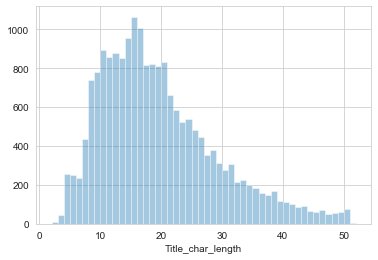

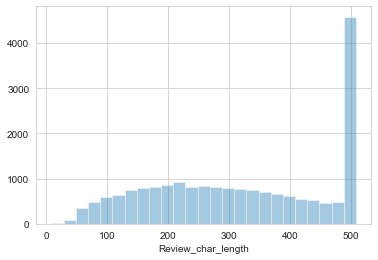

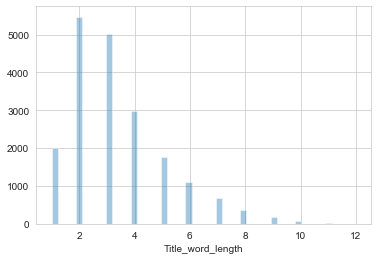

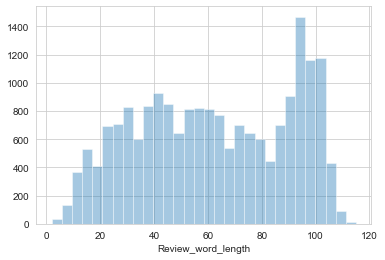

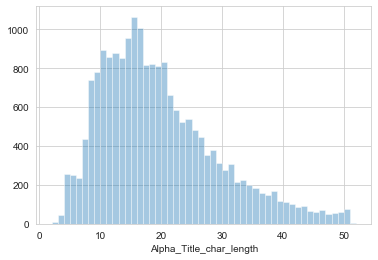

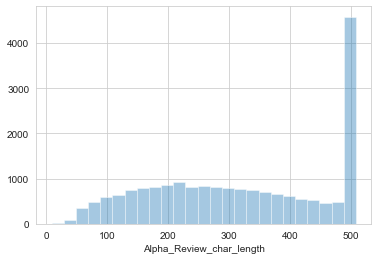

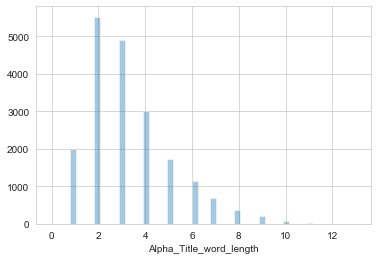

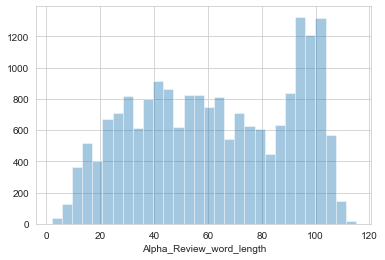

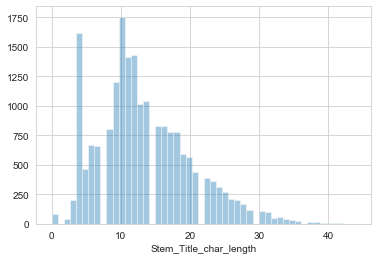

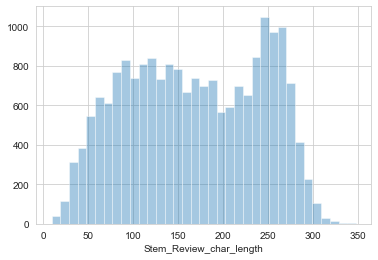

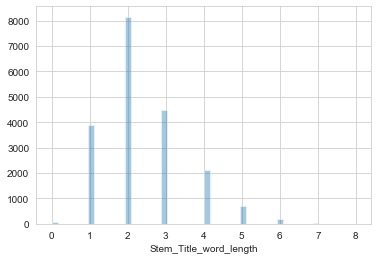

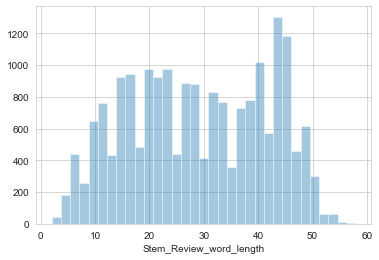

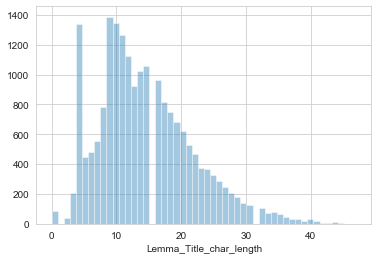

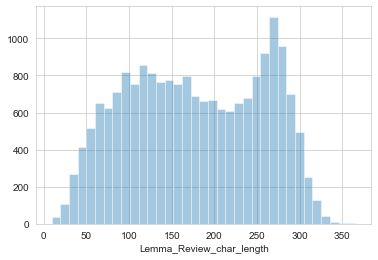

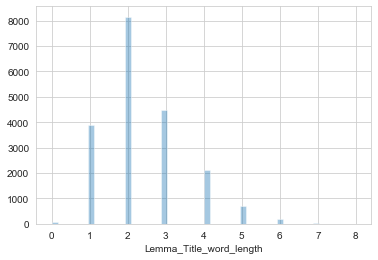

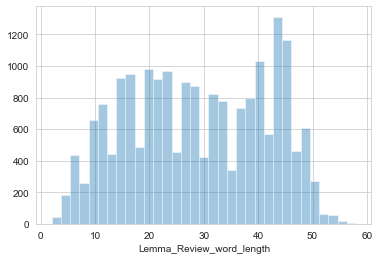

In [36]:
for i in df_length.drop('Sentiment', axis=1).columns:
    sns.distplot(df_length[i], kde=False)
    plt.show()

<Figure size 1080x720 with 0 Axes>

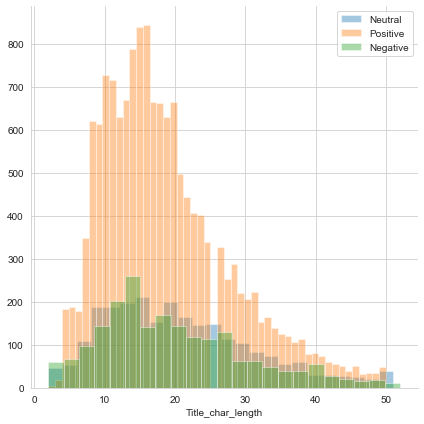

<Figure size 1080x720 with 0 Axes>

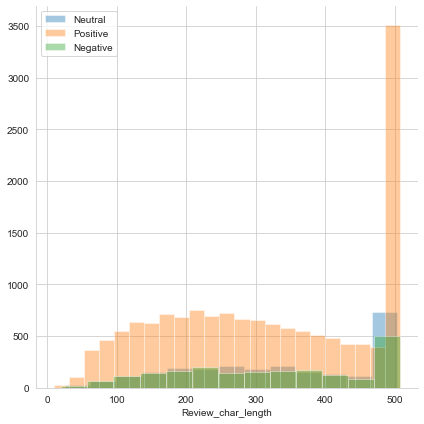

<Figure size 1080x720 with 0 Axes>

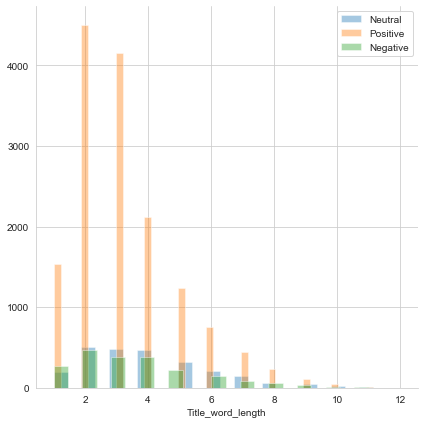

<Figure size 1080x720 with 0 Axes>

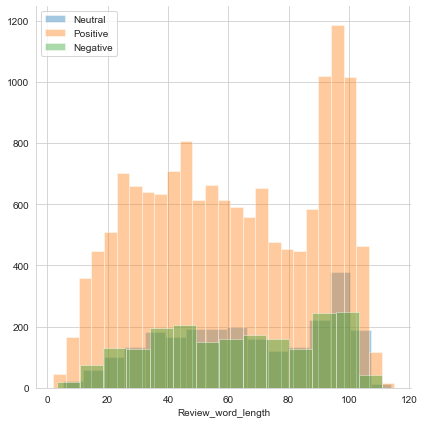

<Figure size 1080x720 with 0 Axes>

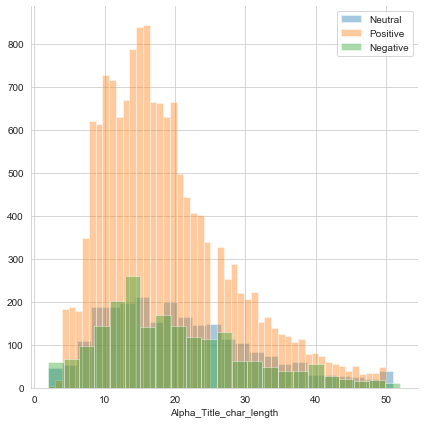

<Figure size 1080x720 with 0 Axes>

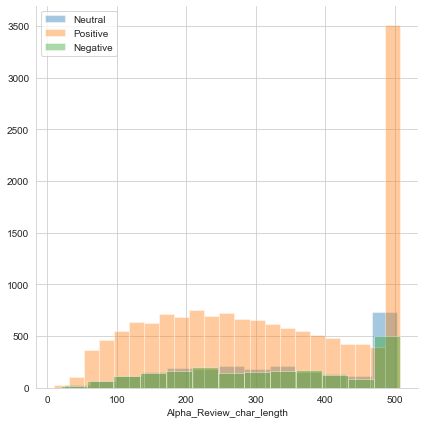

<Figure size 1080x720 with 0 Axes>

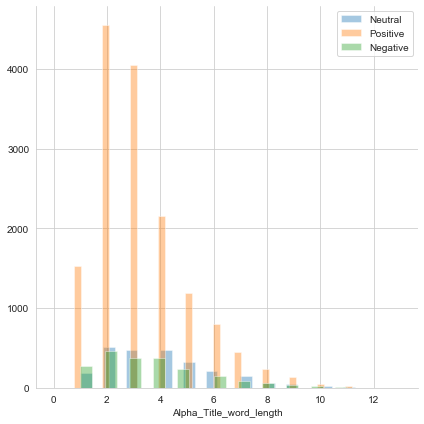

<Figure size 1080x720 with 0 Axes>

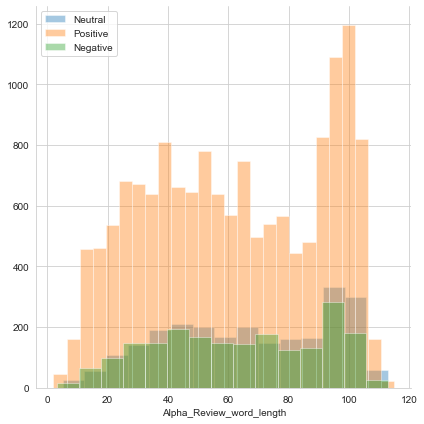

<Figure size 1080x720 with 0 Axes>

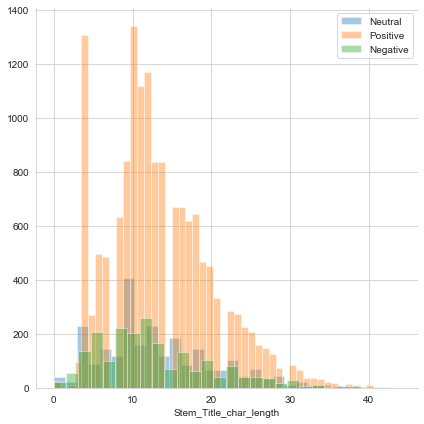

<Figure size 1080x720 with 0 Axes>

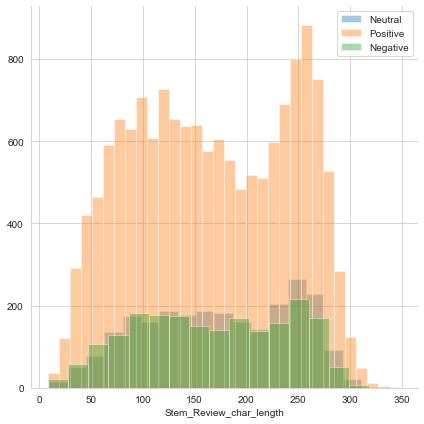

<Figure size 1080x720 with 0 Axes>

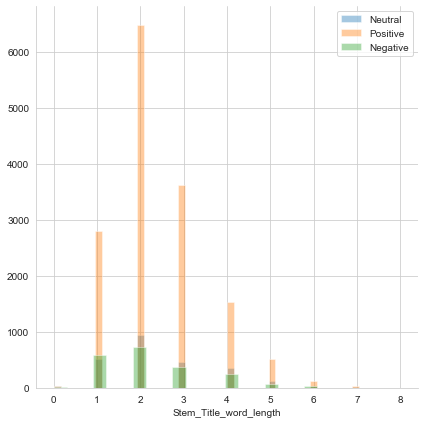

<Figure size 1080x720 with 0 Axes>

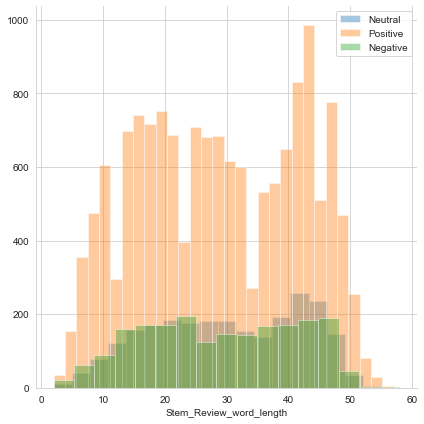

<Figure size 1080x720 with 0 Axes>

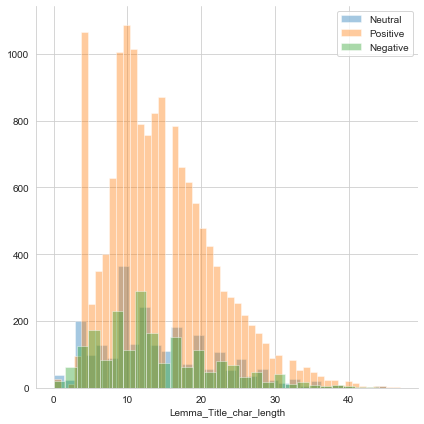

<Figure size 1080x720 with 0 Axes>

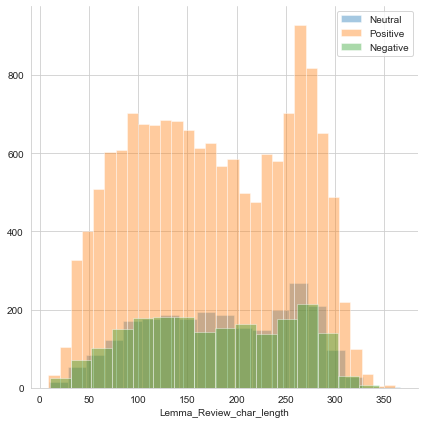

<Figure size 1080x720 with 0 Axes>

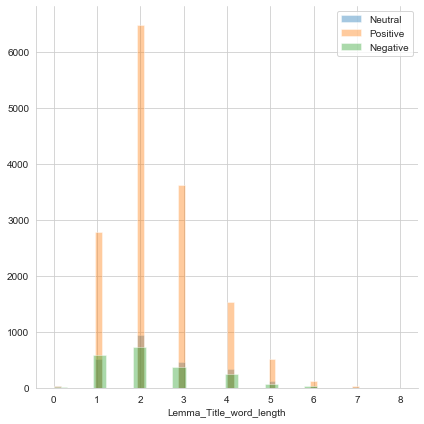

<Figure size 1080x720 with 0 Axes>

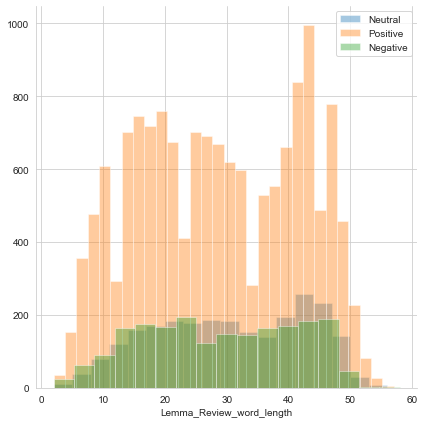

In [37]:
for i in df_length.drop('Sentiment', axis=1).columns:
    plt.figure(figsize = (15,10))
    g = sns.FacetGrid(df_length, hue = 'Sentiment', height=6)
    g = g.map(sns.distplot, i , kde=False)
    plt.legend()
    plt.show()

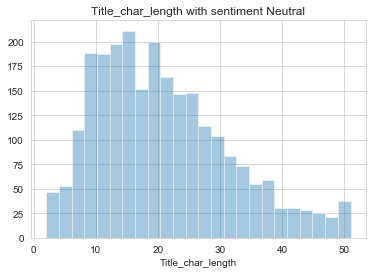

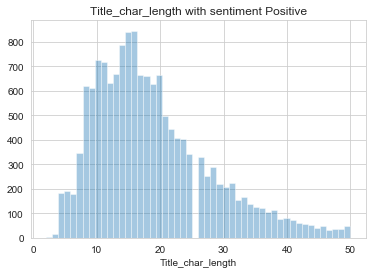

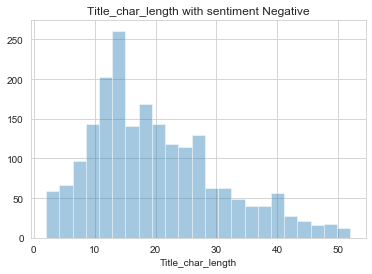

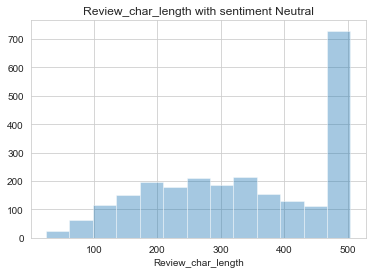

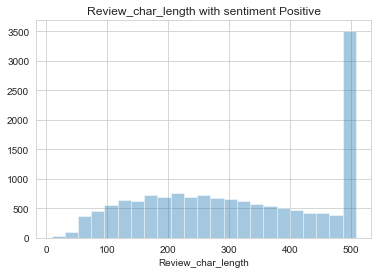

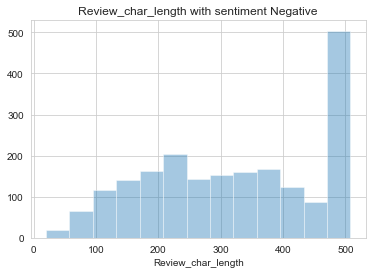

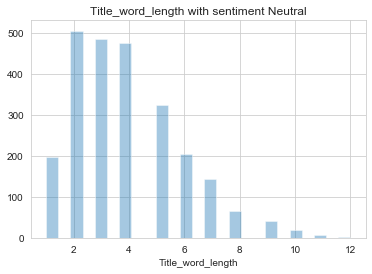

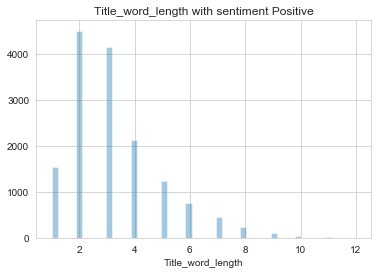

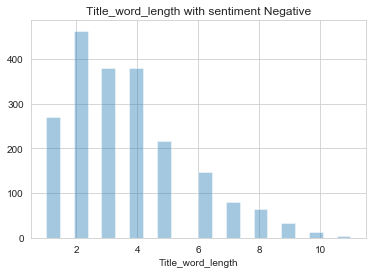

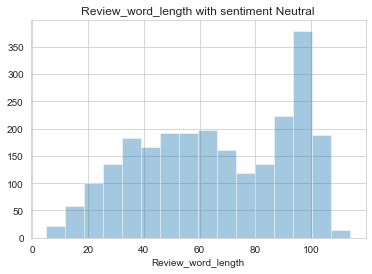

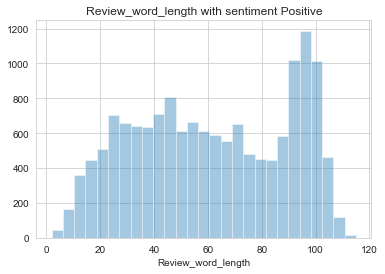

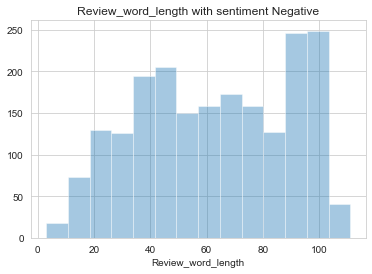

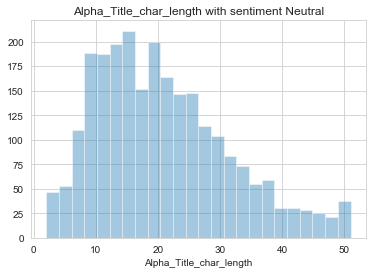

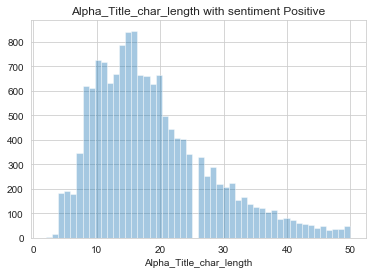

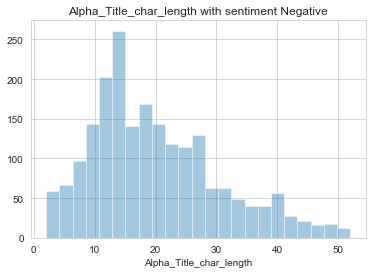

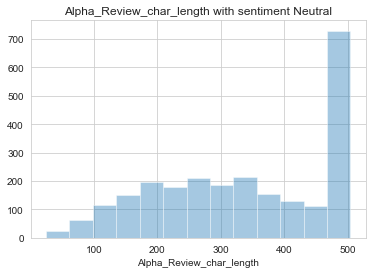

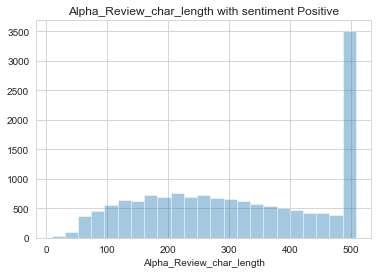

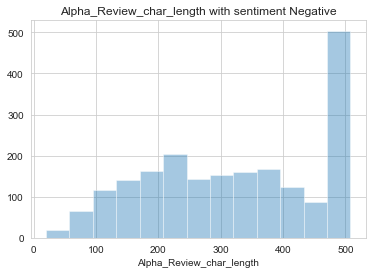

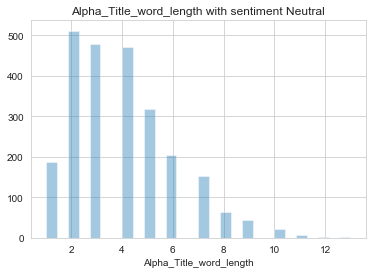

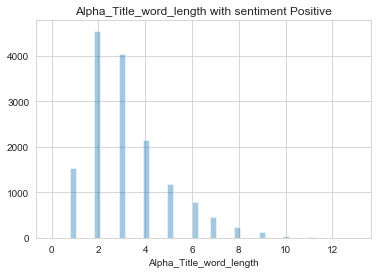

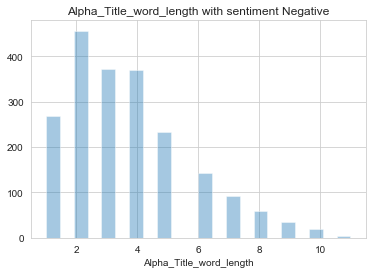

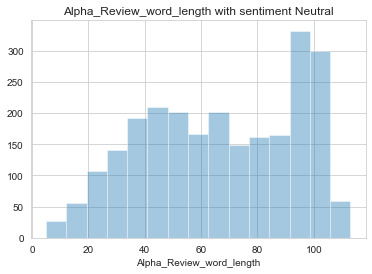

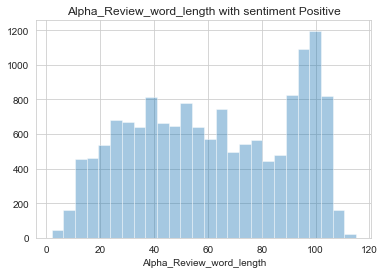

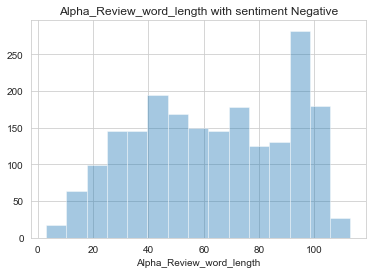

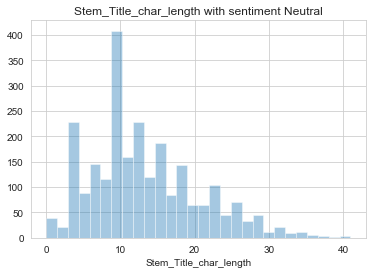

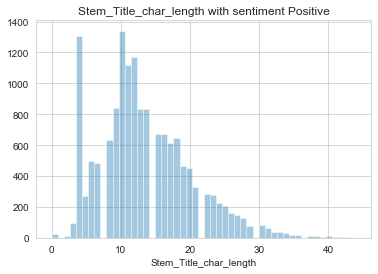

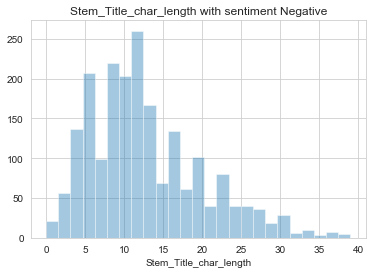

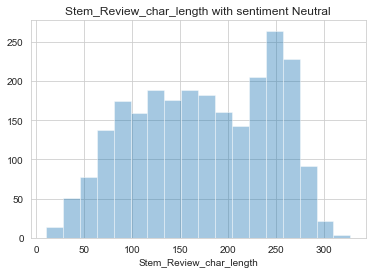

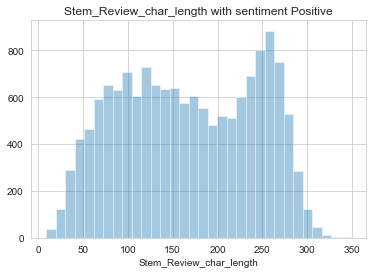

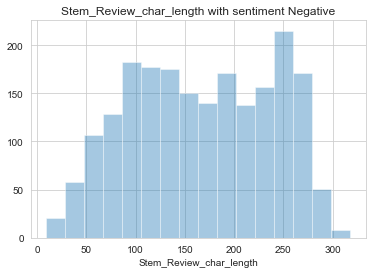

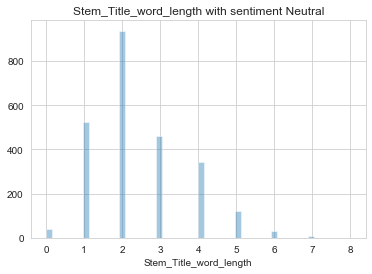

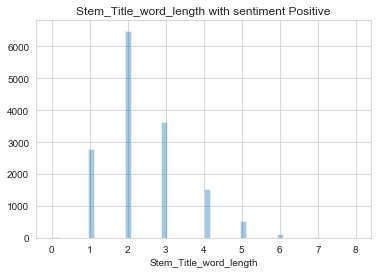

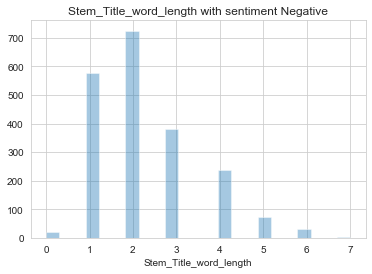

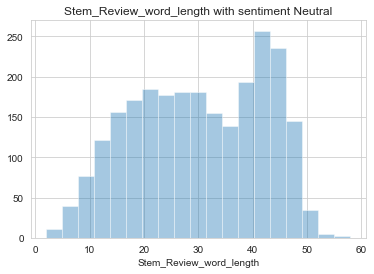

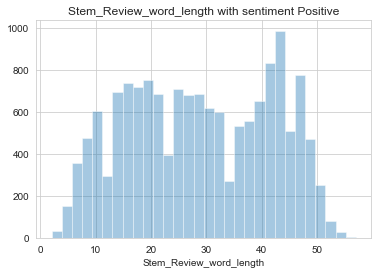

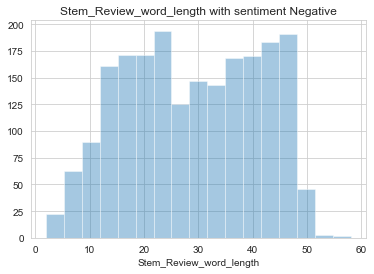

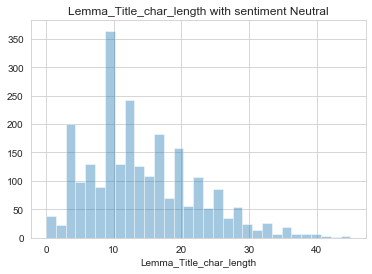

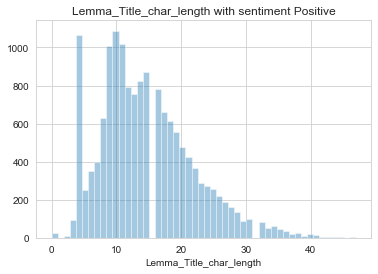

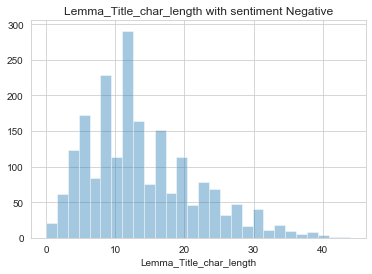

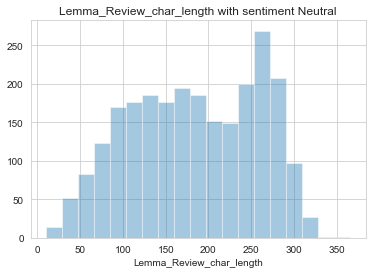

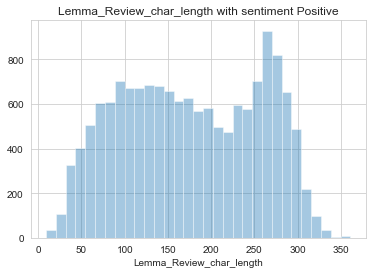

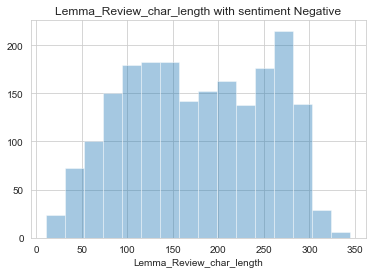

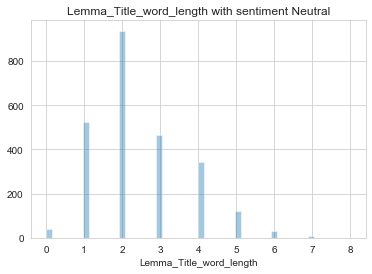

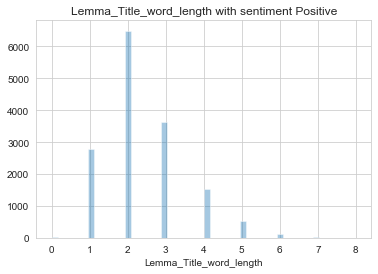

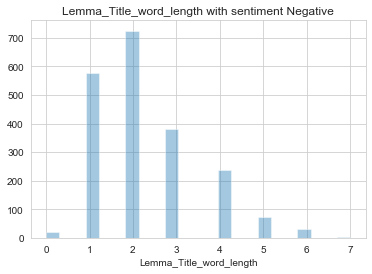

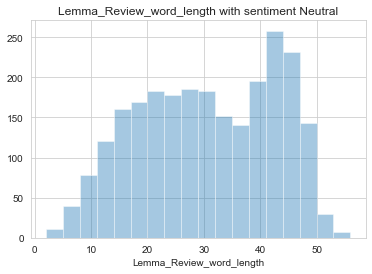

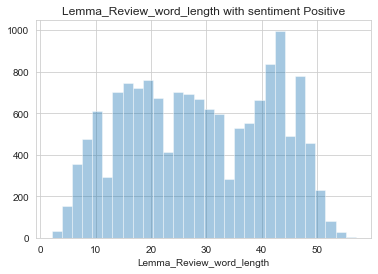

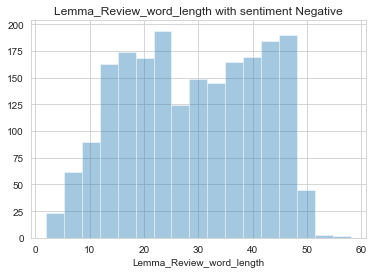

In [38]:
for j in df_length.drop('Sentiment', axis=1).columns:
    for i in df_length['Sentiment'].unique():
        sns.distplot(df_length[j][df_length['Sentiment'] == i], kde=False)
        plt.title(str(j) + ' with sentiment ' + str(i))
        plt.show()

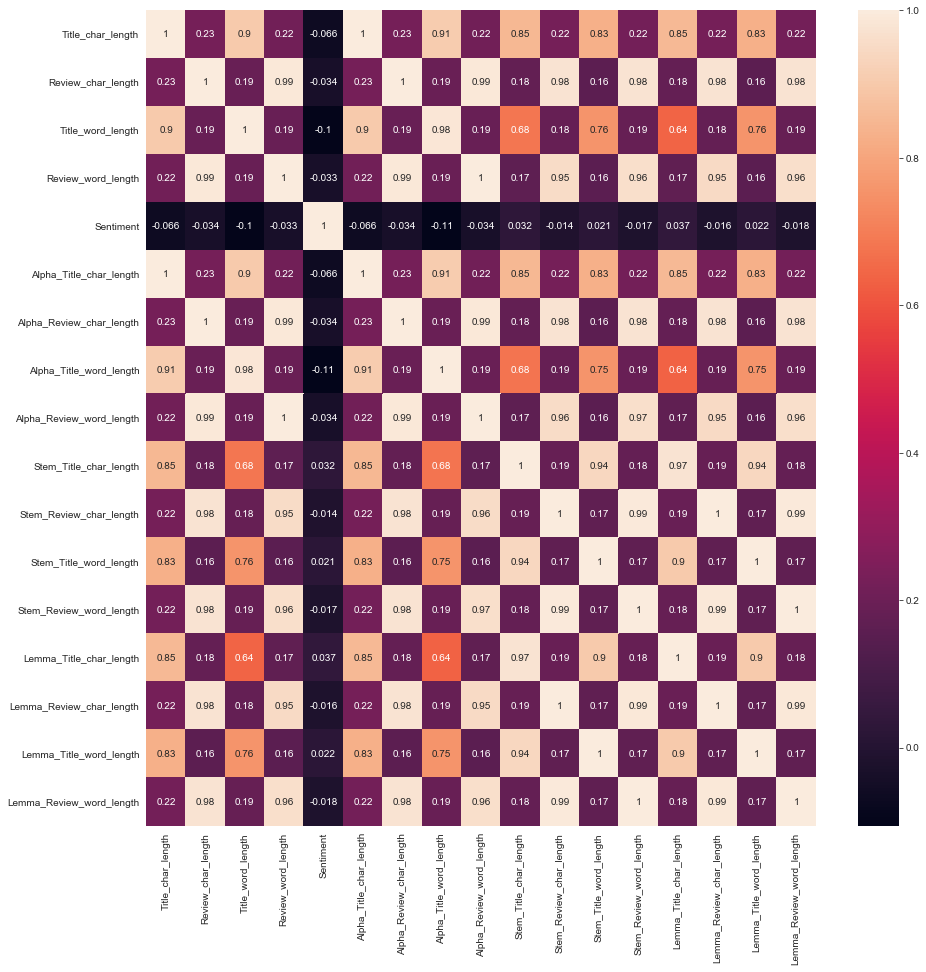

In [39]:
plt.figure(figsize=(15,15))
df_length['Sentiment'] = df_length['Sentiment'].replace({'Positive': 1, 'Neutral': 0, 'Negative': -1})
sns.heatmap(df_length.corr(), annot=True)
plt.show()

## Showing the Most Common and Rare Words for each Sentiment

In [55]:
def show_most_word(sentiment, column, number = 20, n_grams=1, common=True):
    word = []
    
    # Split word based on the parameter
    if n_grams == 1:
        df_sentiment[df_sentiment['Sentiment'] == sentiment][column].apply(lambda x: word.extend((x.split())))
        grams = ''
    elif n_grams == 2:
        df_sentiment[df_sentiment['Sentiment'] == sentiment][column].apply(lambda x: word.extend(nltk.bigrams(x.split())))
        grams = 'bigram-'
        
    # Use NLTK FreqDist to get most common word    
    if common == True:
        words_count = nltk.FreqDist(word)
        most_common = words_count.most_common(number)
        dict_most = dict(most_common)
    elif common == False:    
        words_count = nltk.FreqDist(word)
        most_common = words_count.most_common()[-number:]
        dict_most = dict(most_common)
        
    # Plot the most common word
    if n_grams == 1:
        key = list(dict_most.keys())
    elif n_grams == 2:
        keys = list(dict_most.keys())
        b = []
        for i in range(len(keys)):
            c = ' '.join(keys[i])
            b.append(c)
        key = b    
    plt.figure(figsize=(15,8))
    sns.barplot(x=key, y=list(dict_most.values()))
    plt.ylabel('Word Count', fontsize=16)
    plt.xticks(fontsize=12, rotation=45)
    if common == True:
        commons = 'Common'
    else:
        commons = 'Rare'
    plt.title('{} Most {} {}Words in {} {}'.format(number, commons ,grams, sentiment, column), fontsize=20)   
    plt.show()
    
def show_wordcloud(sentiment, column, color='black'):
    data = df_sentiment[df_sentiment['Sentiment'] == sentiment][column]
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000,
                      max_words=50     
                     ).generate(words)
    plt.figure(1,figsize=(10, 10))
    plt.title(str(sentiment) + ' ' + str(column), fontsize=20)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()  

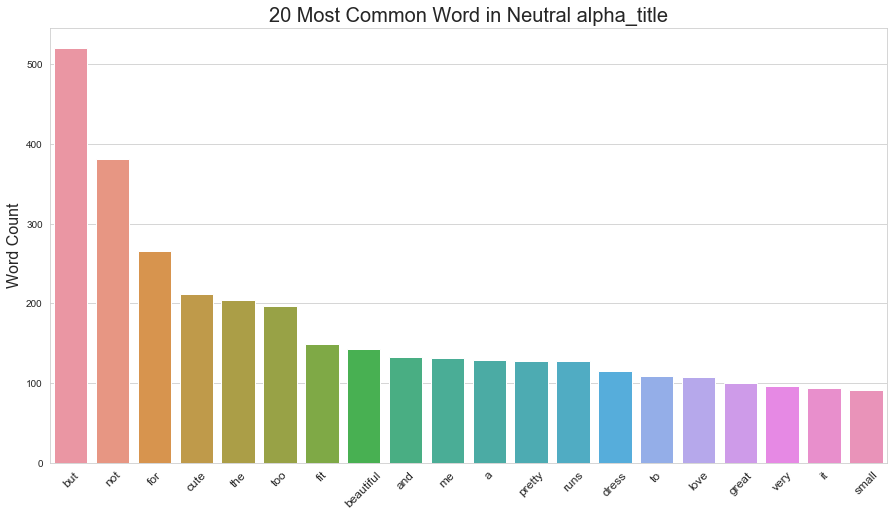

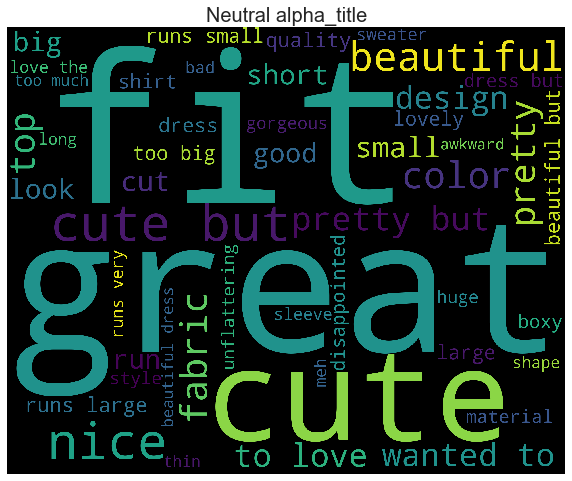

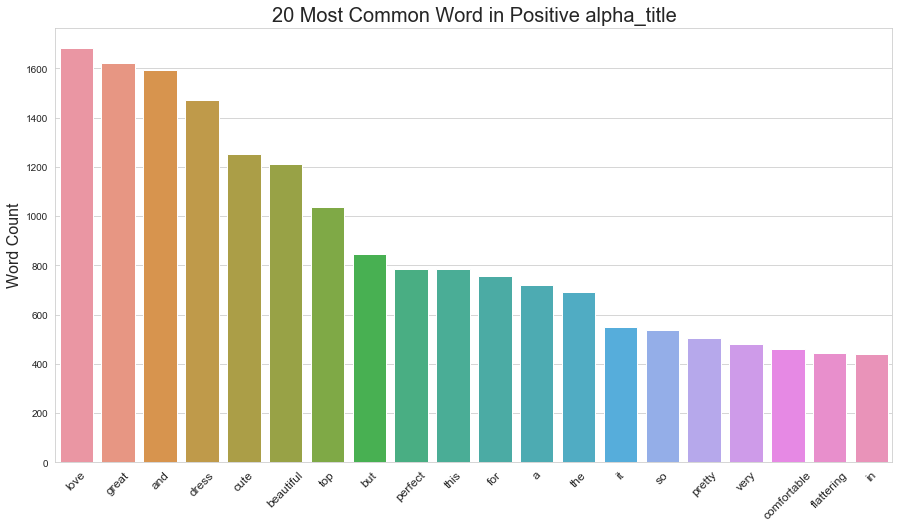

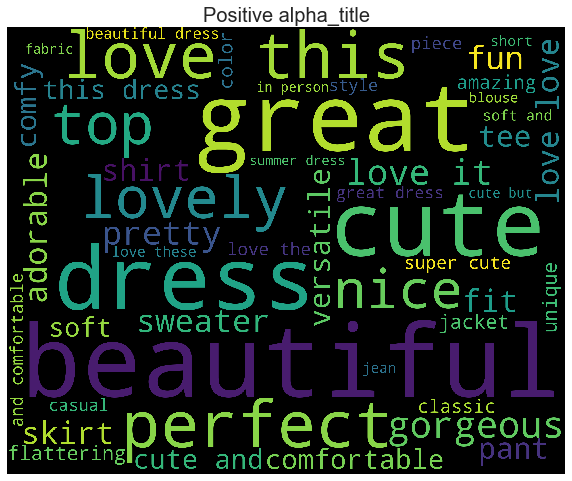

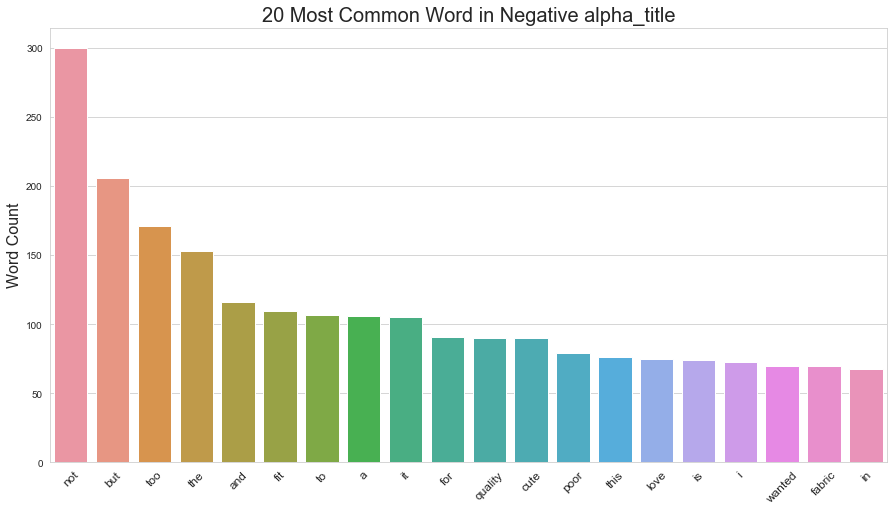

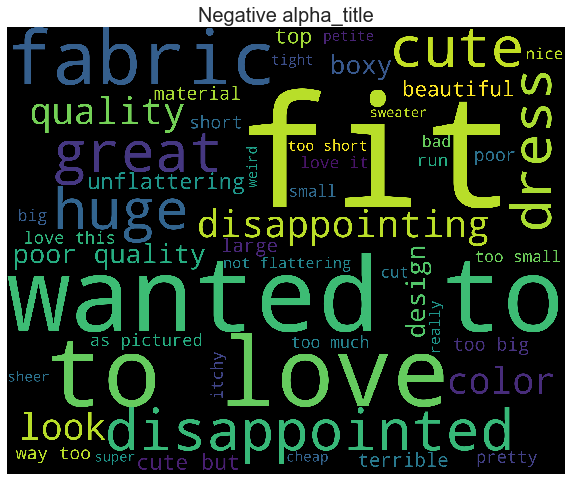

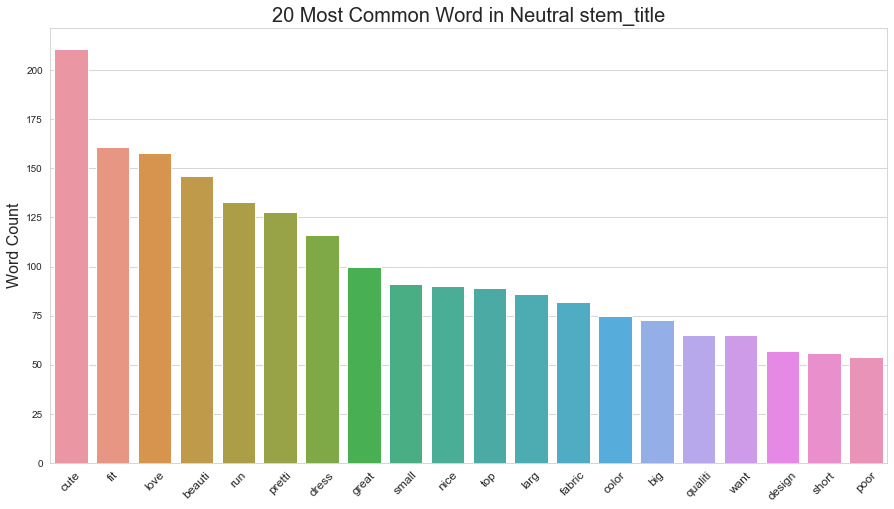

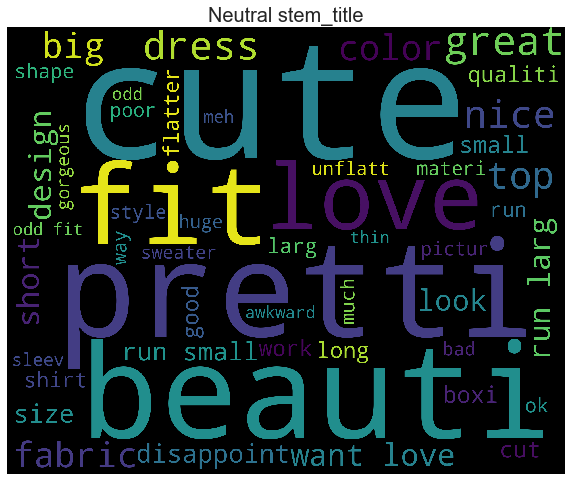

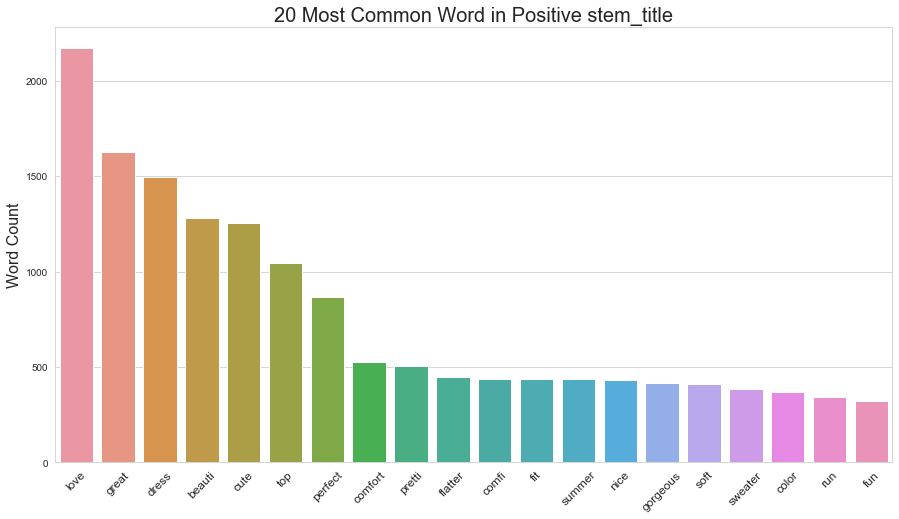

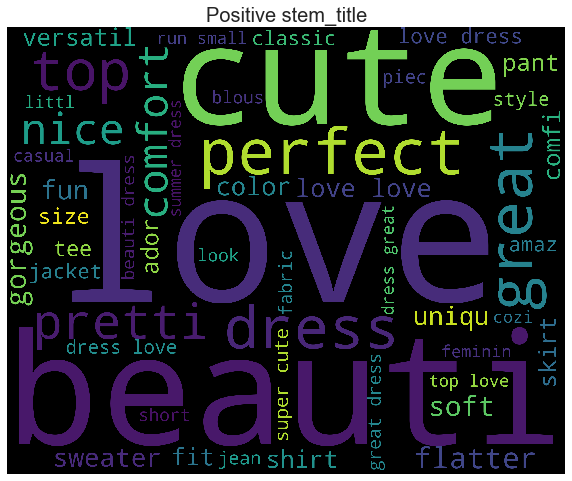

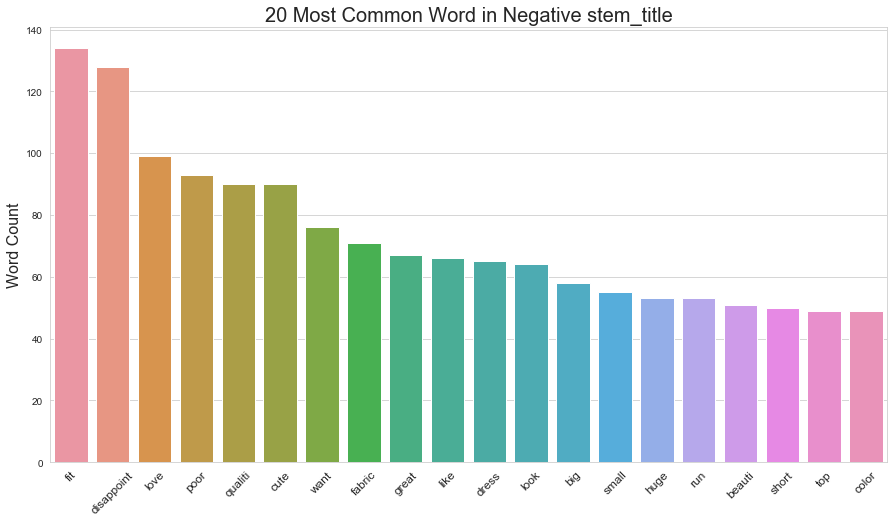

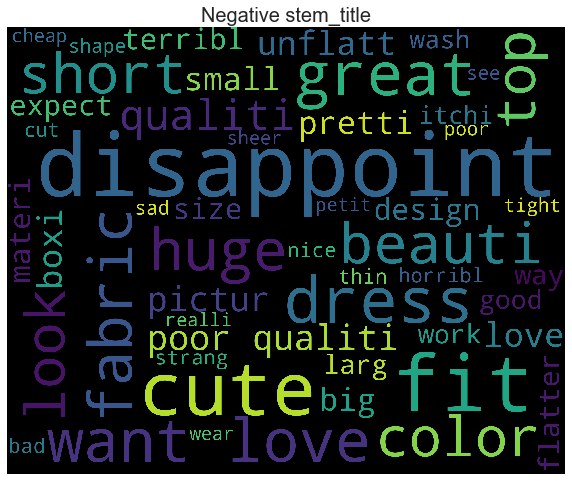

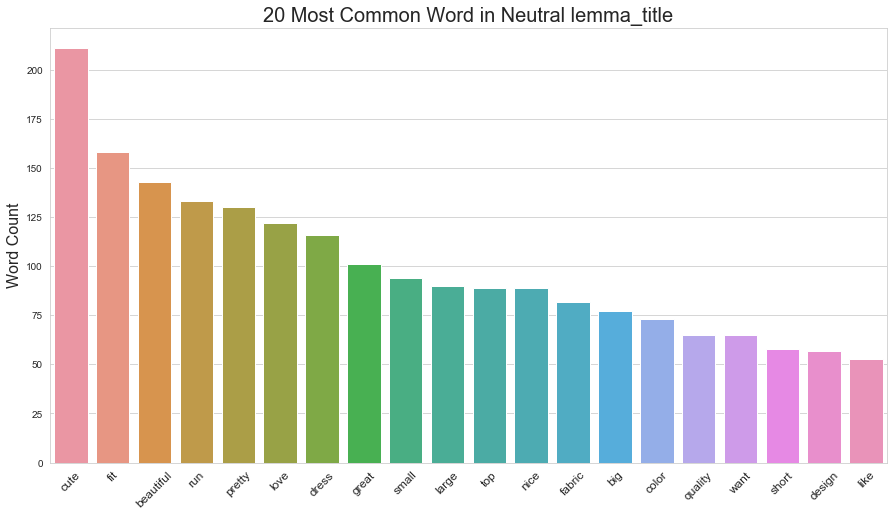

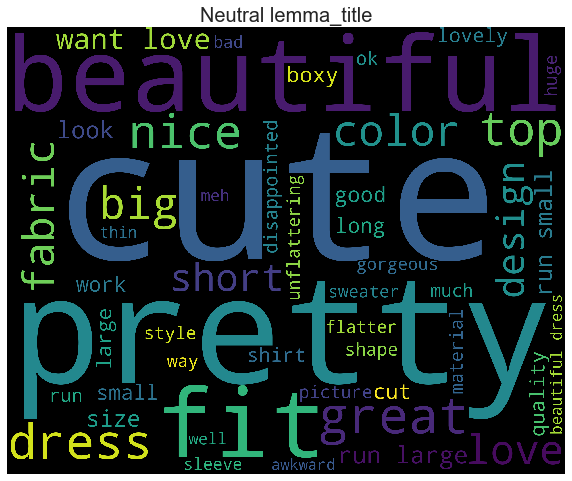

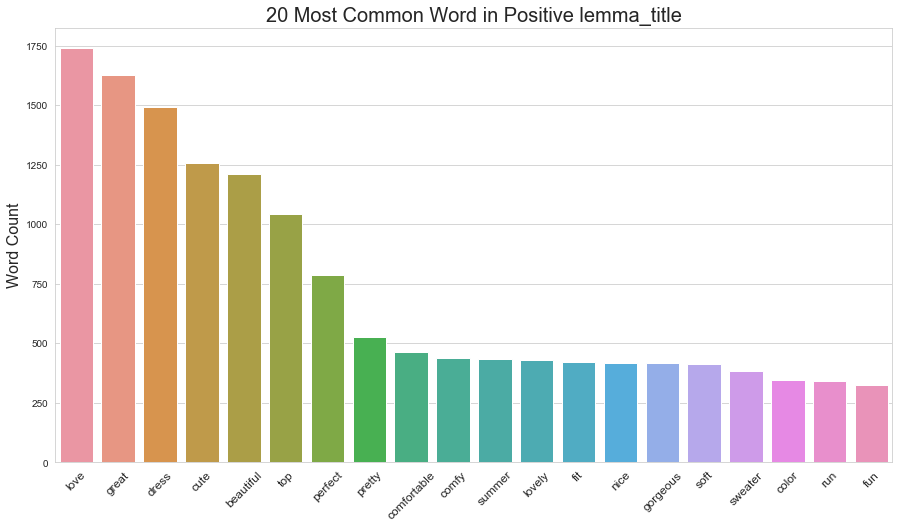

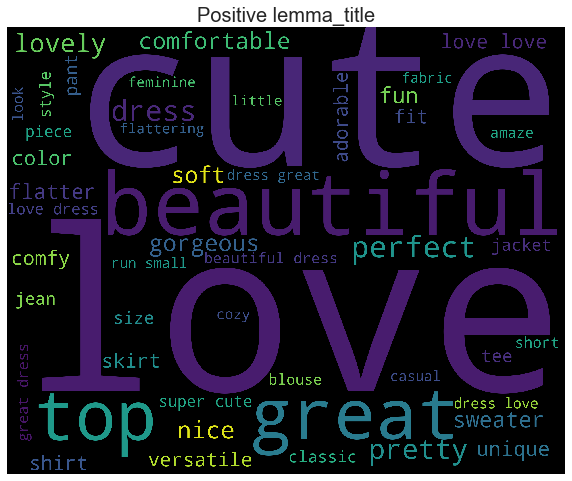

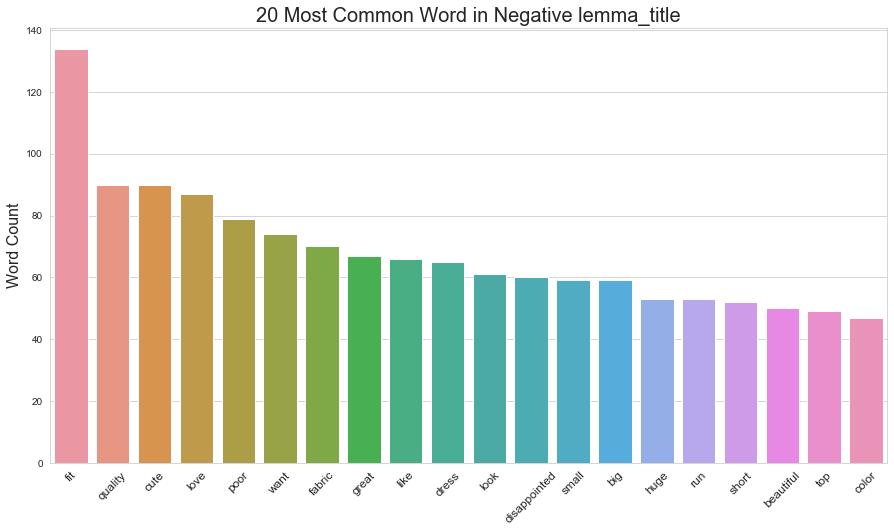

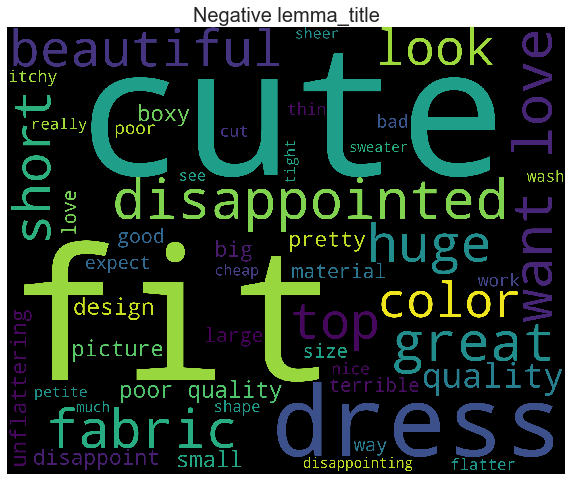

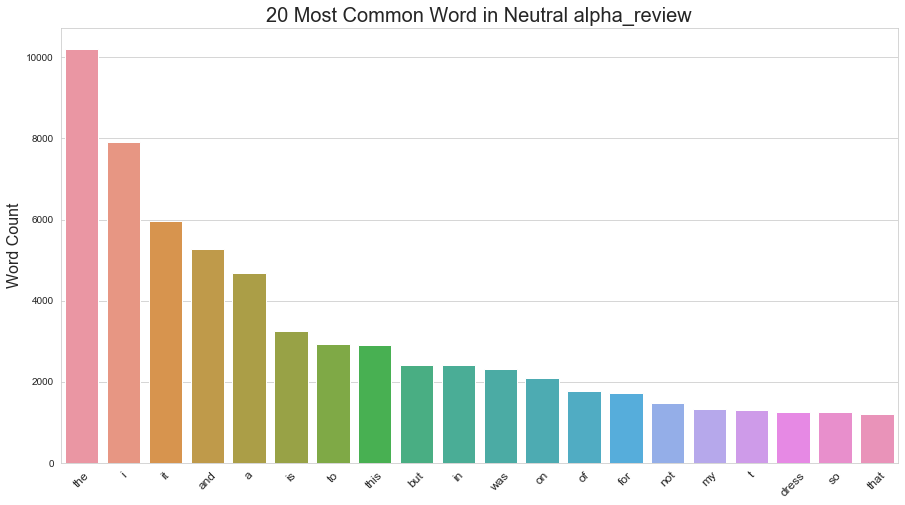

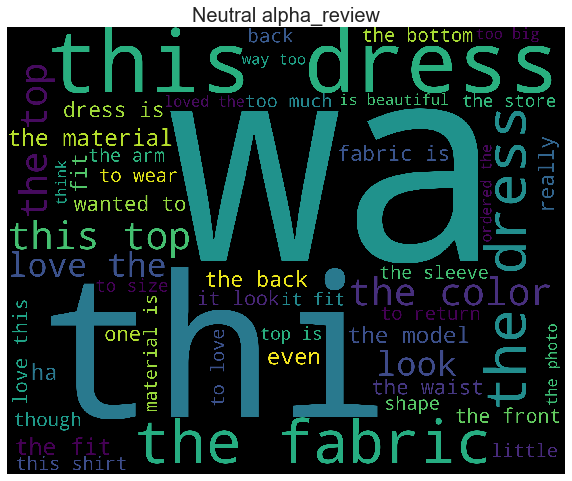

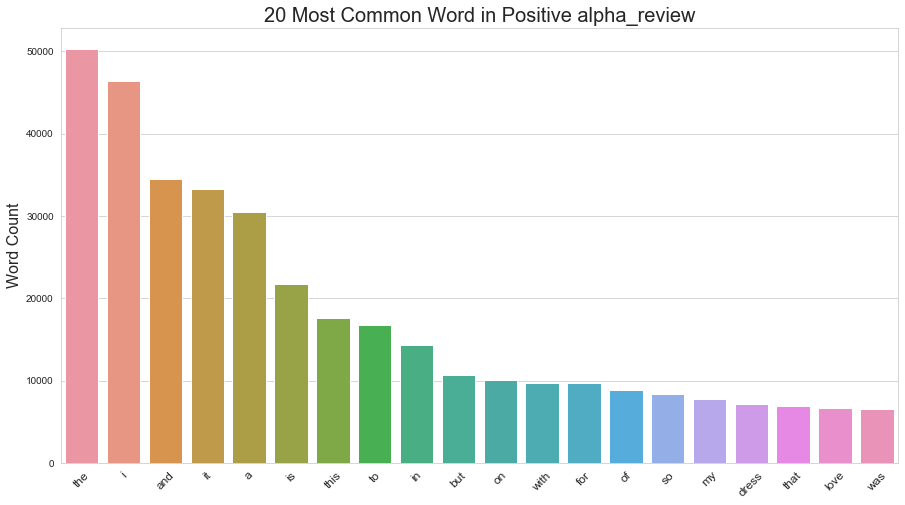

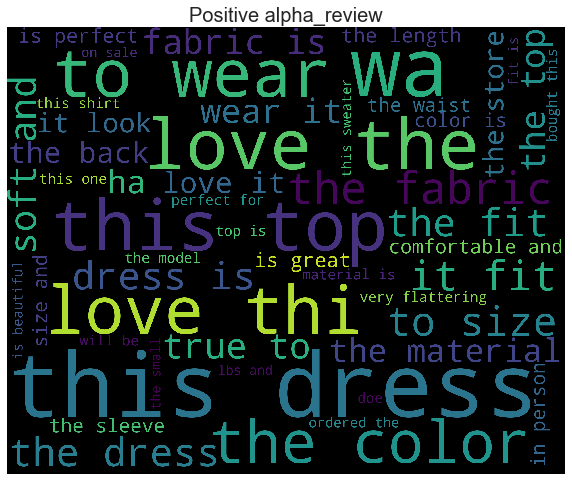

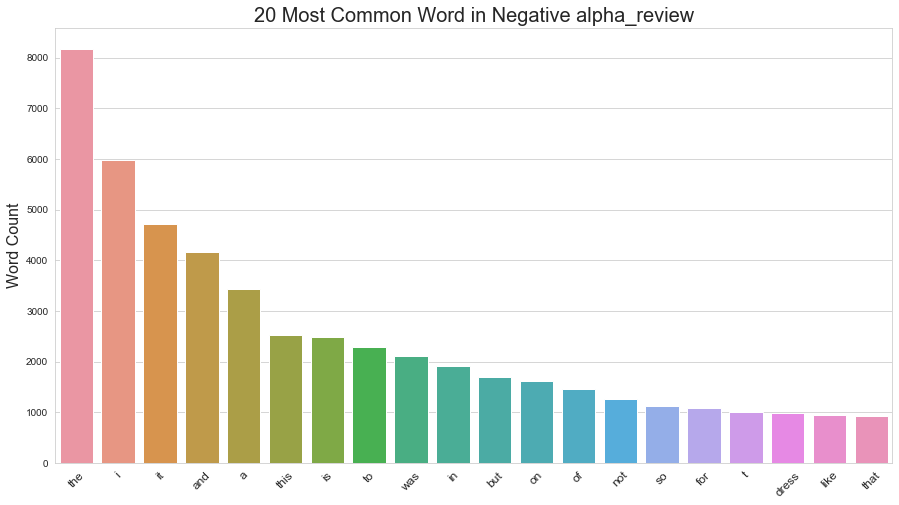

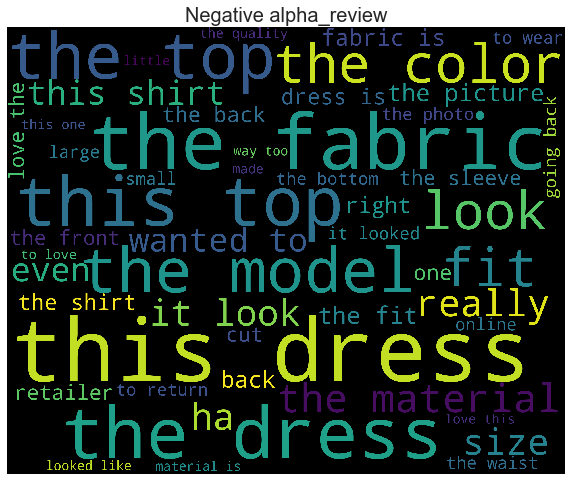

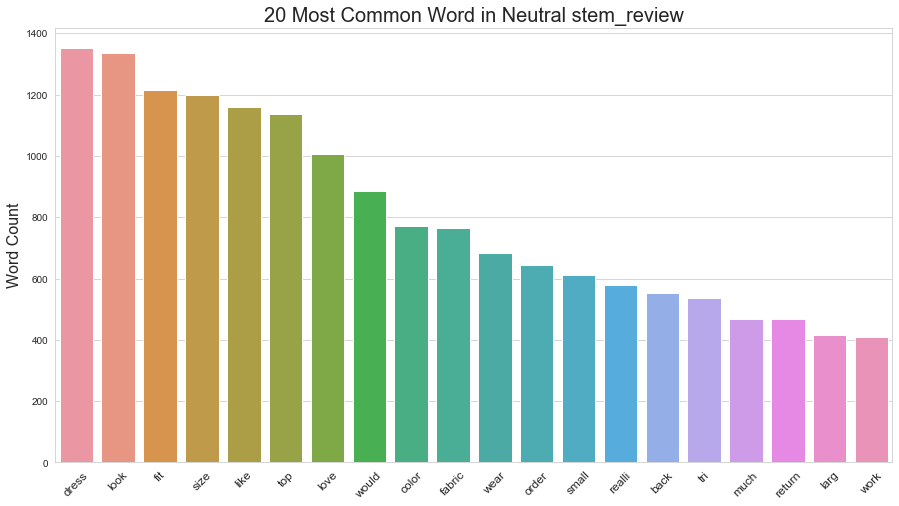

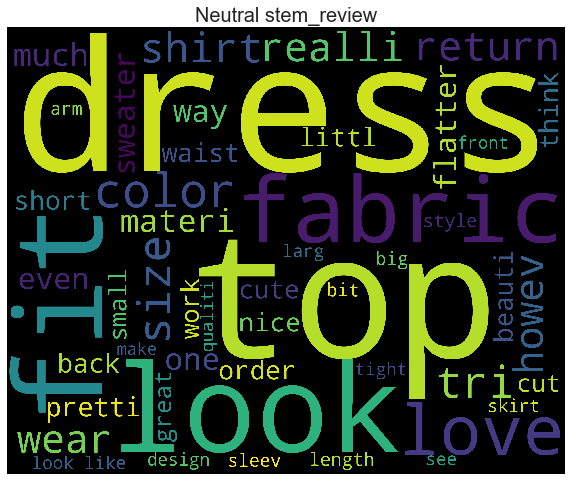

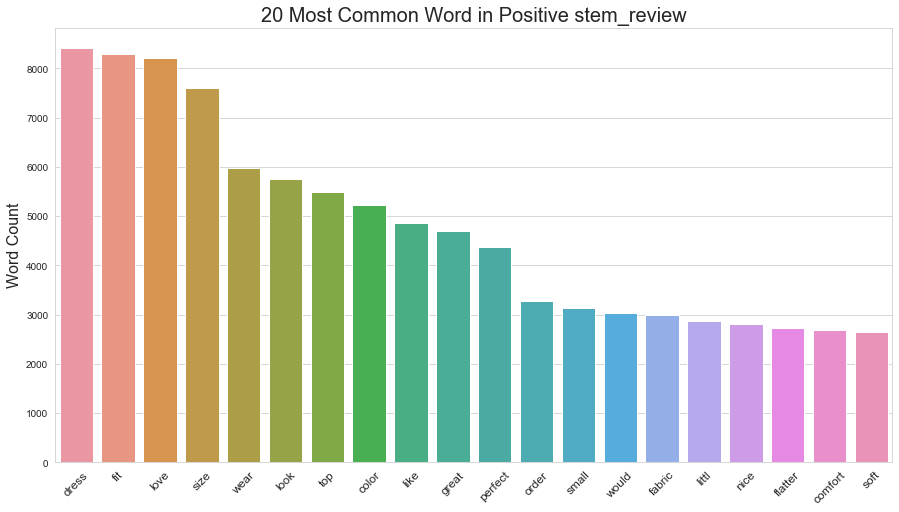

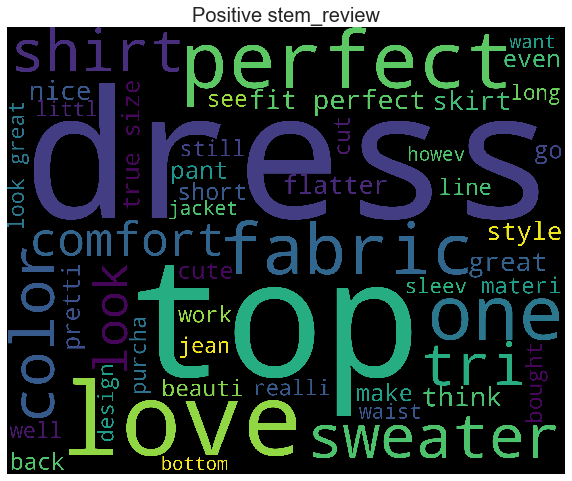

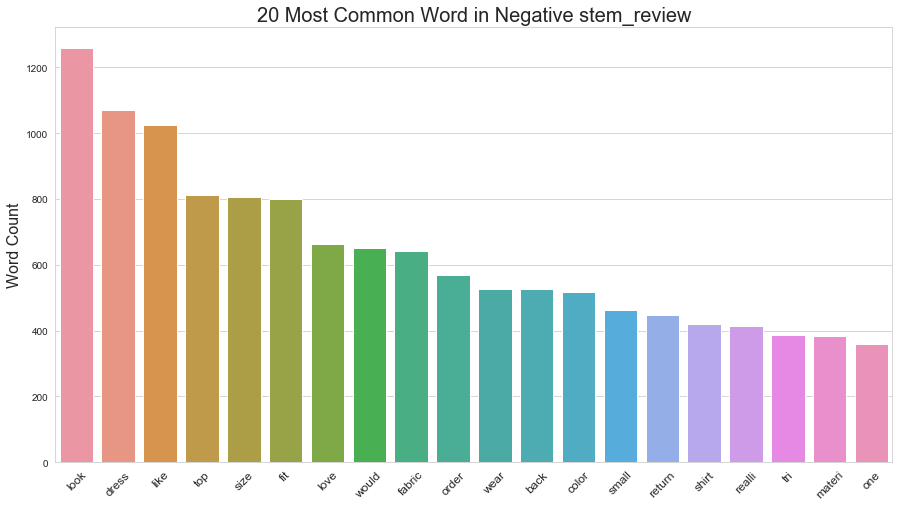

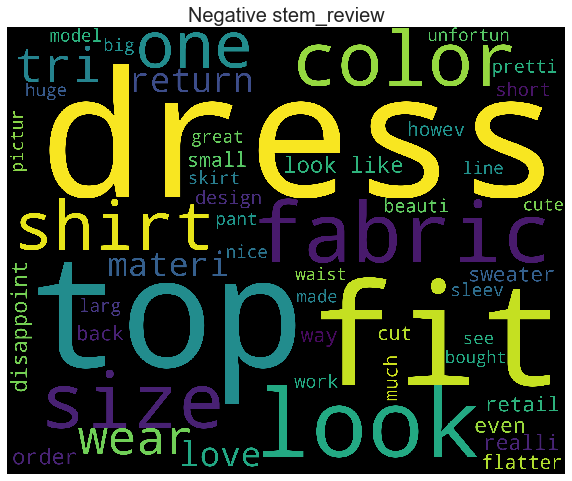

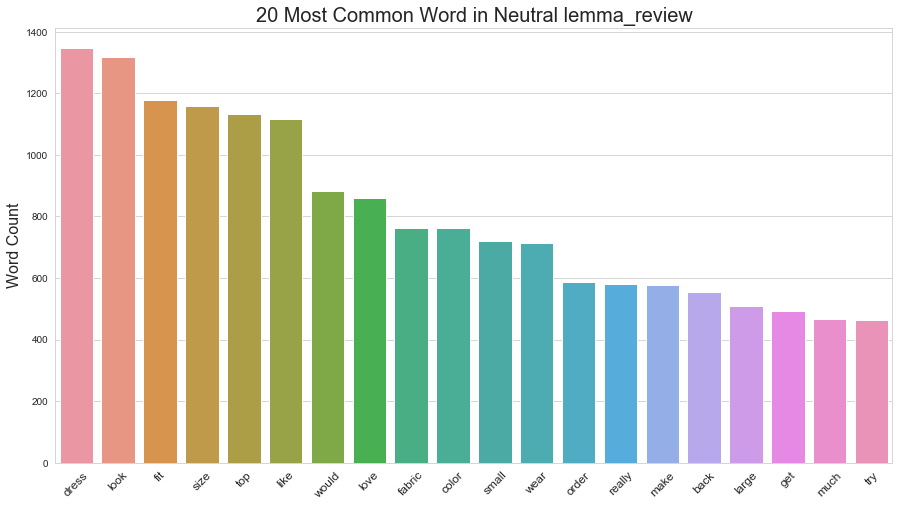

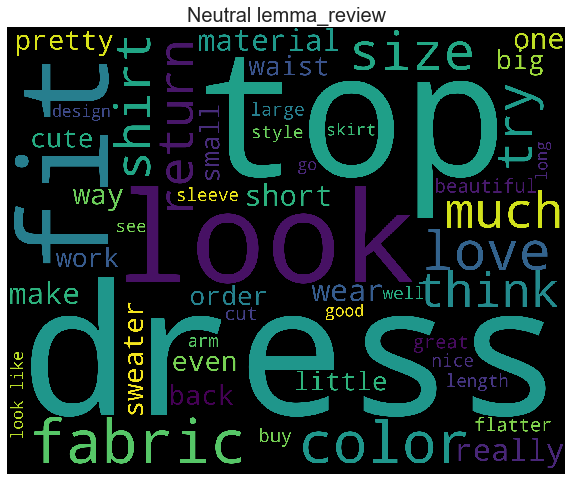

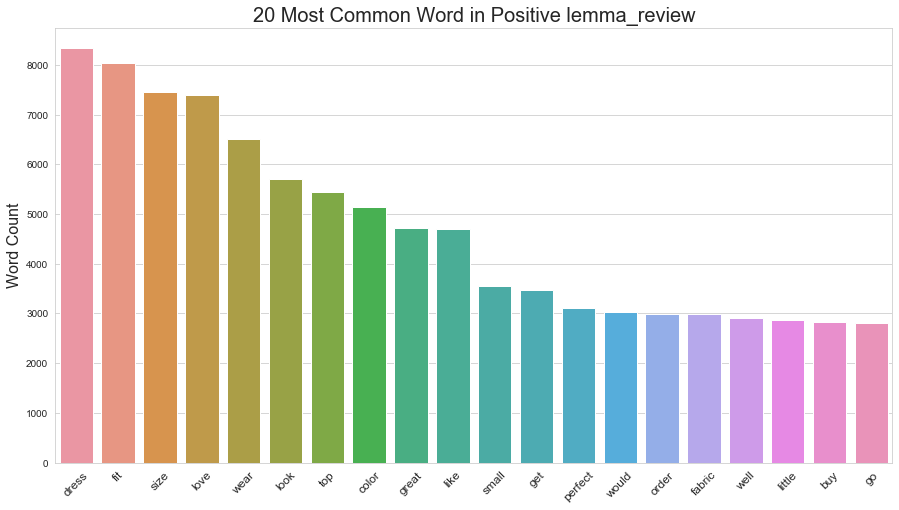

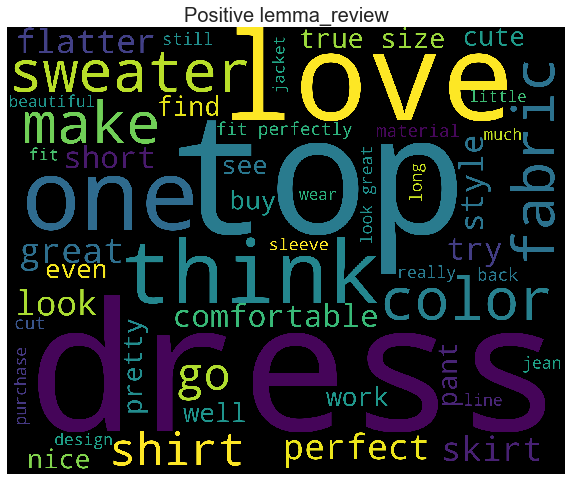

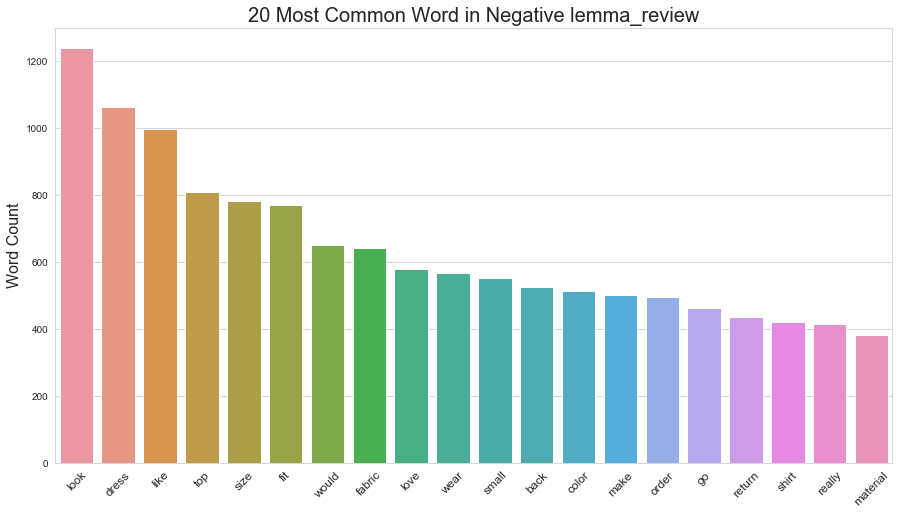

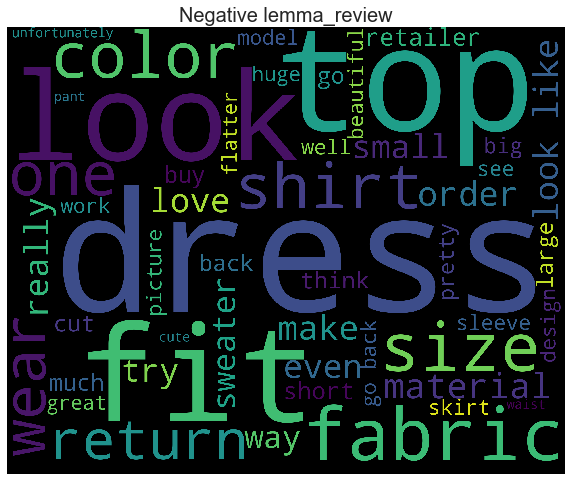

In [42]:
for col in ['alpha_title', 'stem_title', 'lemma_title', 'alpha_review', 'stem_review', 'lemma_review']:
    for sentiment in df_sentiment['Sentiment'].unique():
        show_most_word(sentiment, col ,number=20, n_grams=1)
        show_wordcloud(sentiment, column=col)

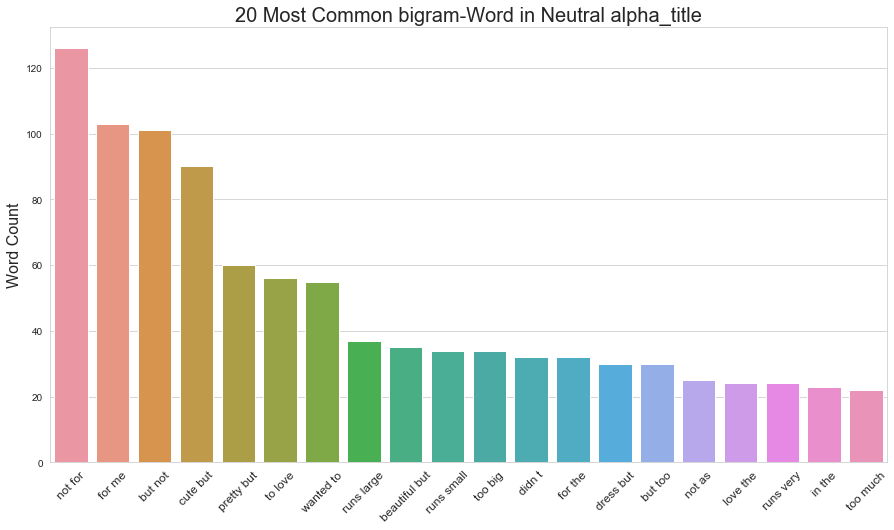

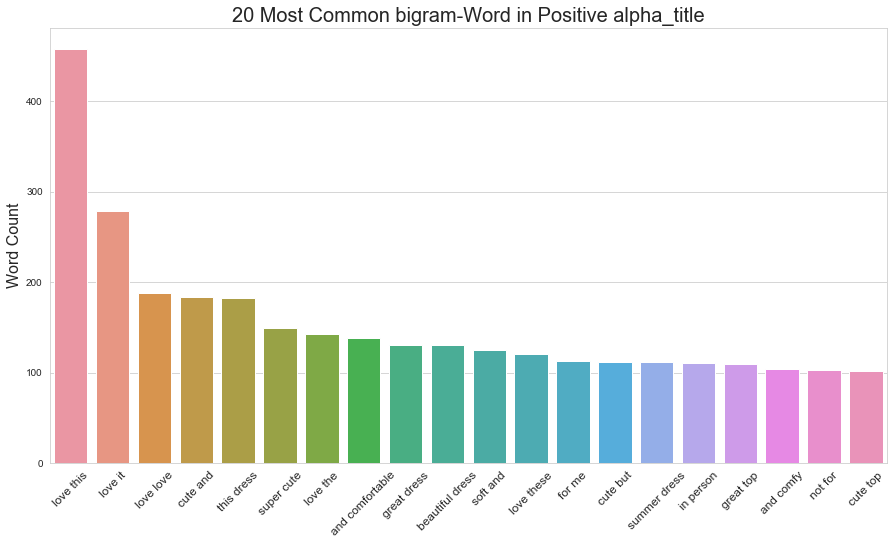

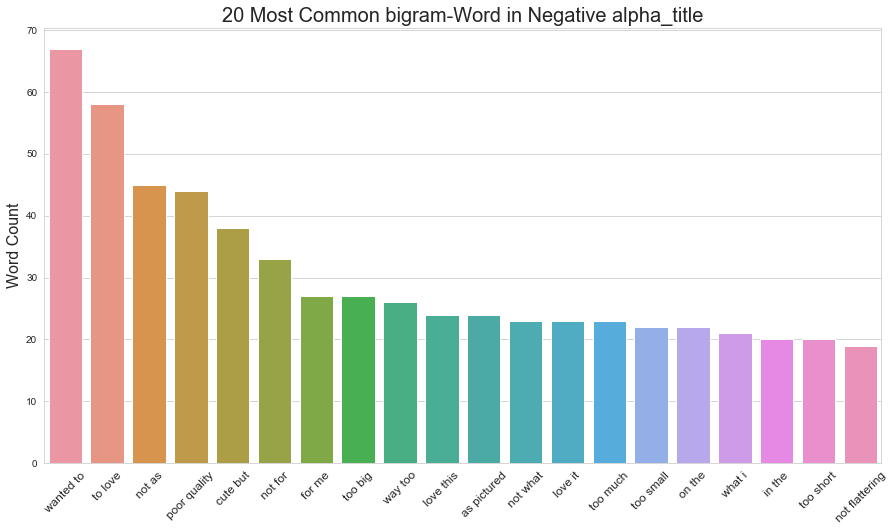

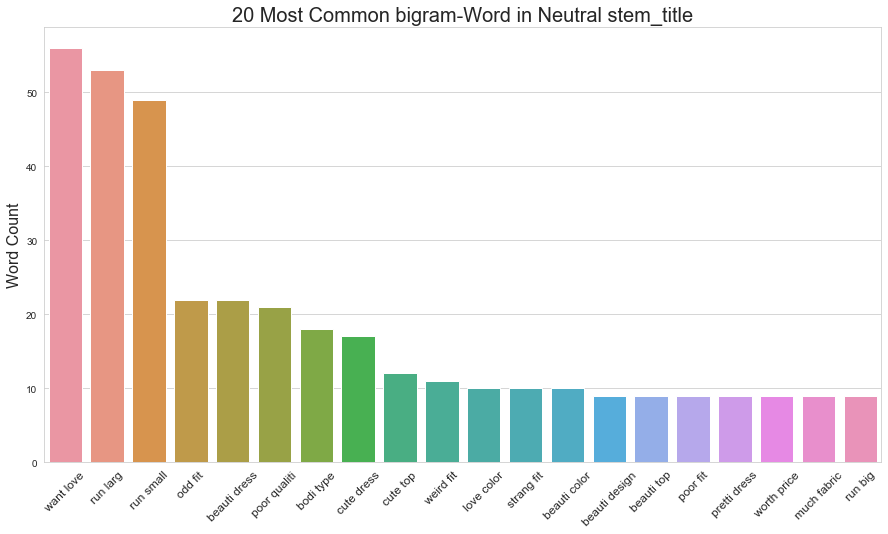

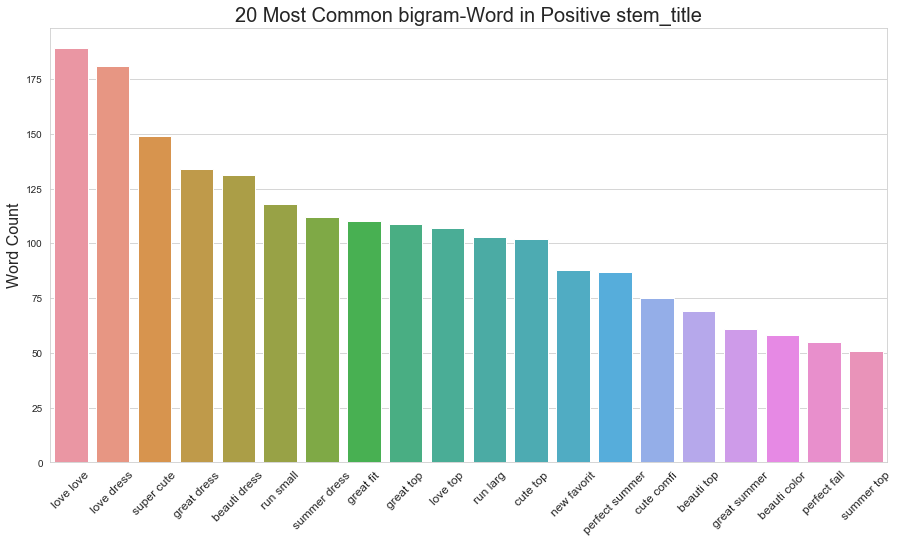

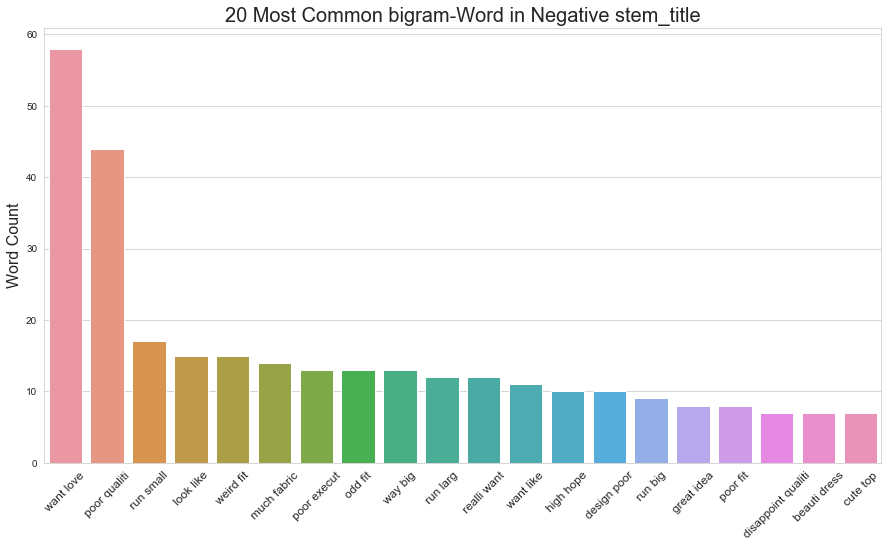

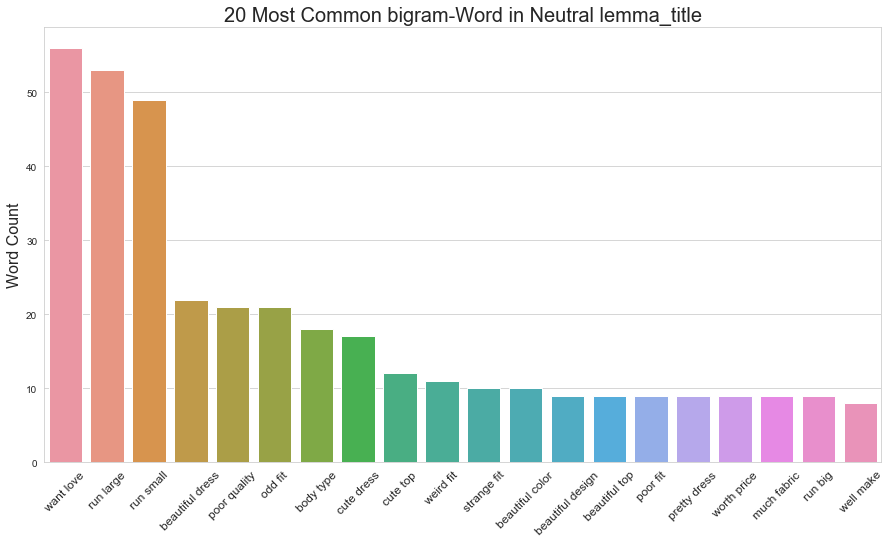

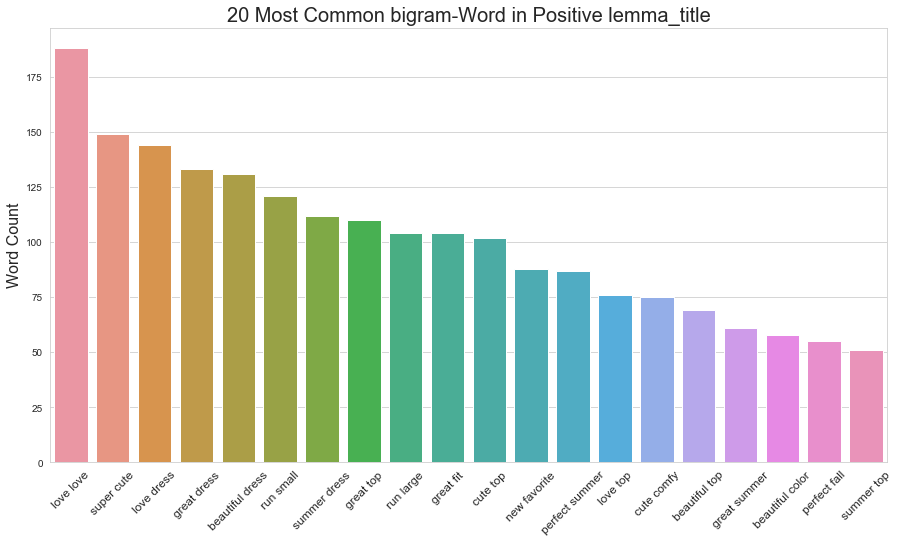

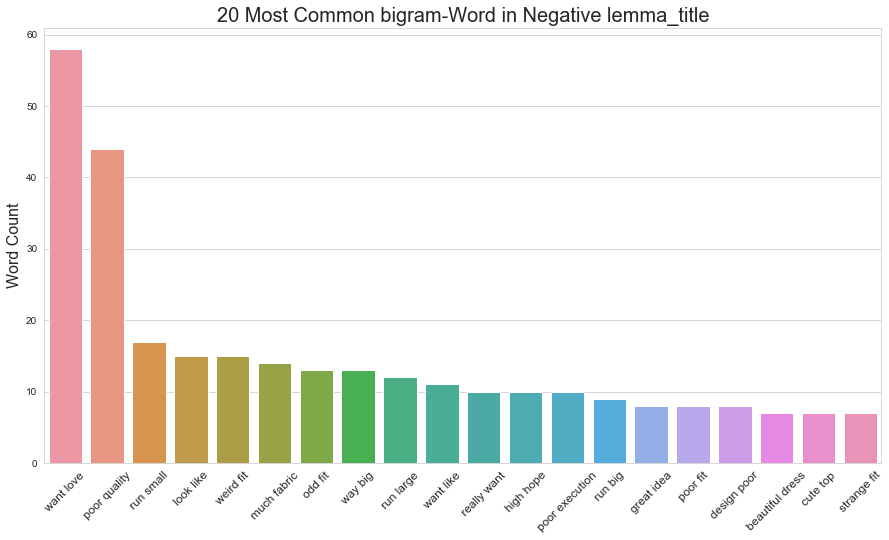

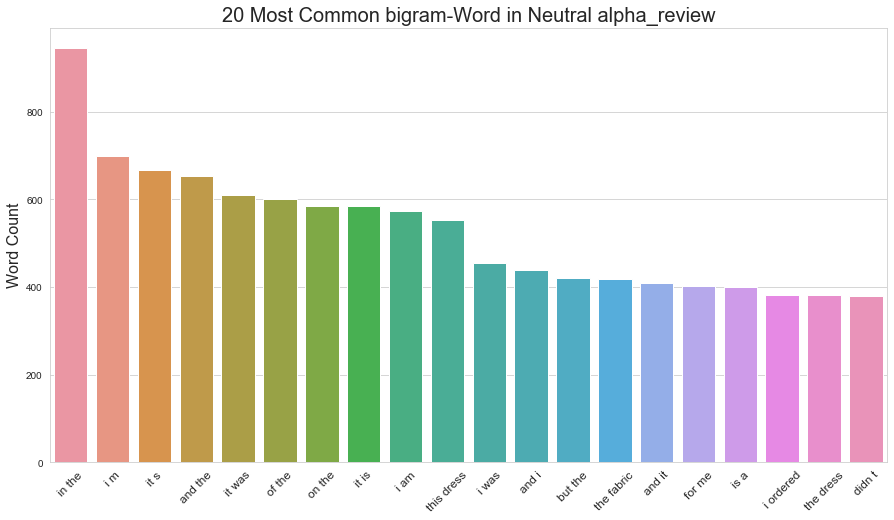

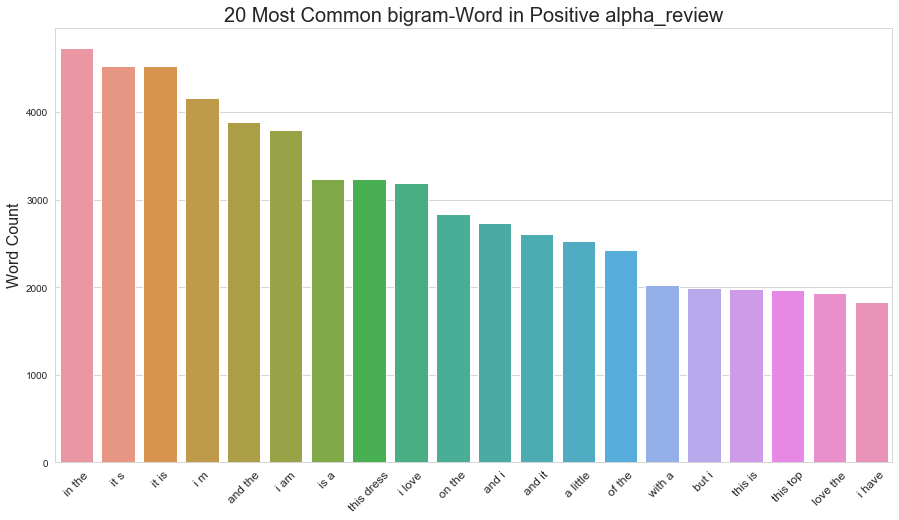

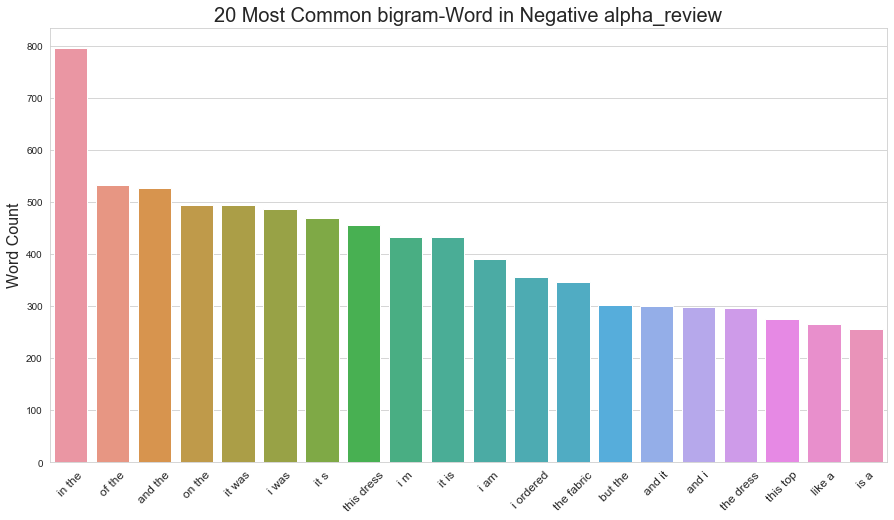

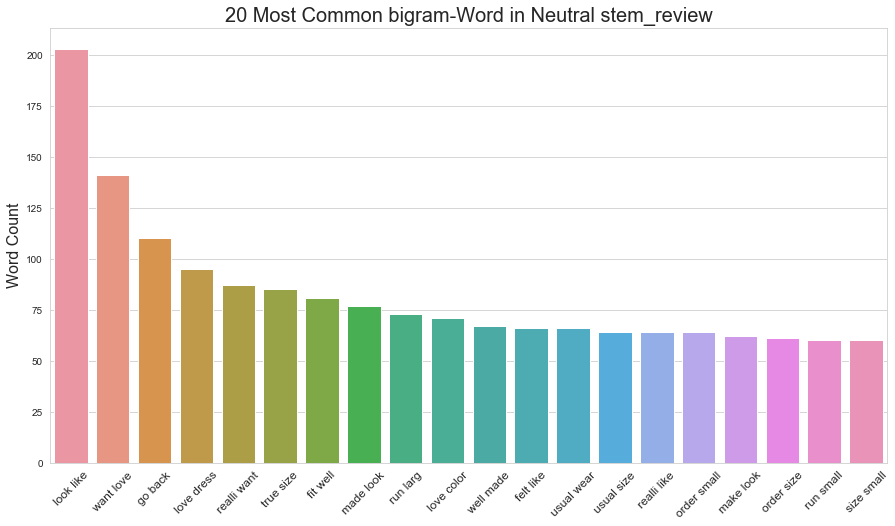

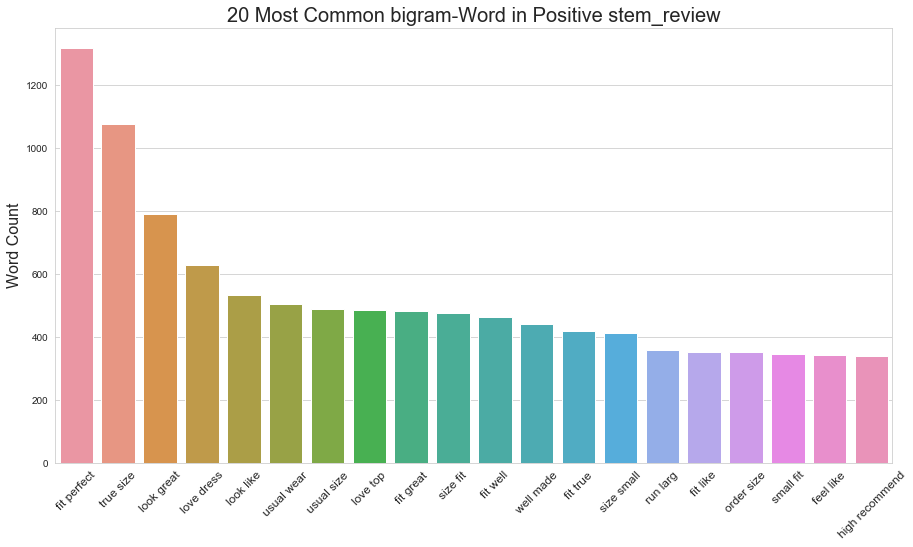

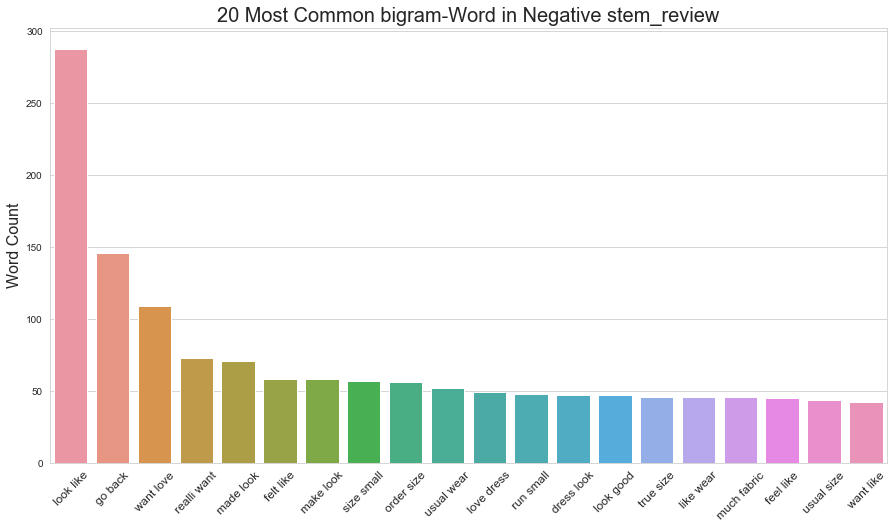

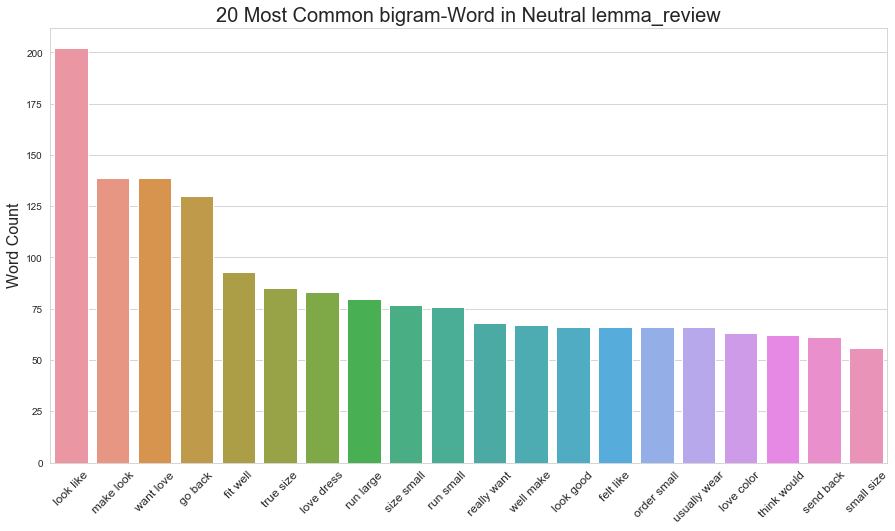

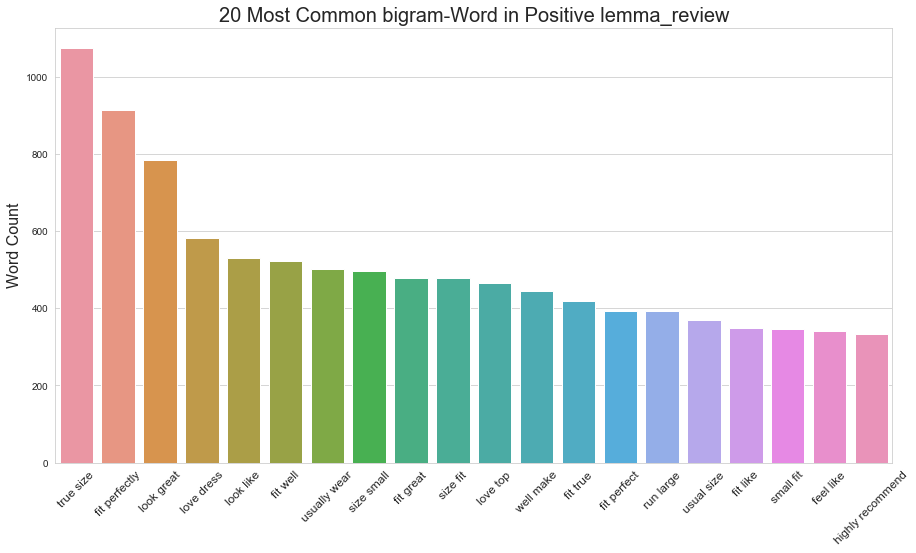

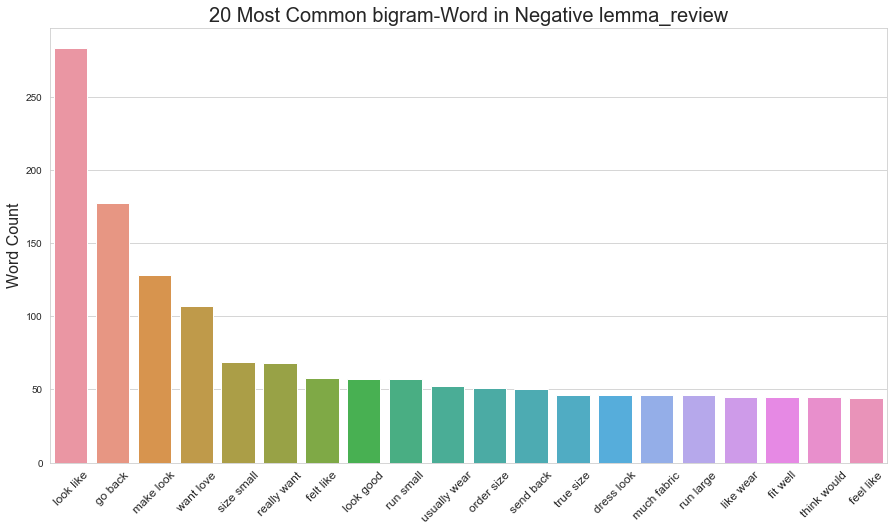

In [43]:
for col in ['alpha_title', 'stem_title', 'lemma_title', 'alpha_review', 'stem_review', 'lemma_review']:   
    for sentiment in df_sentiment['Sentiment'].unique():
        show_most_word(sentiment, col ,number=20, n_grams=2)

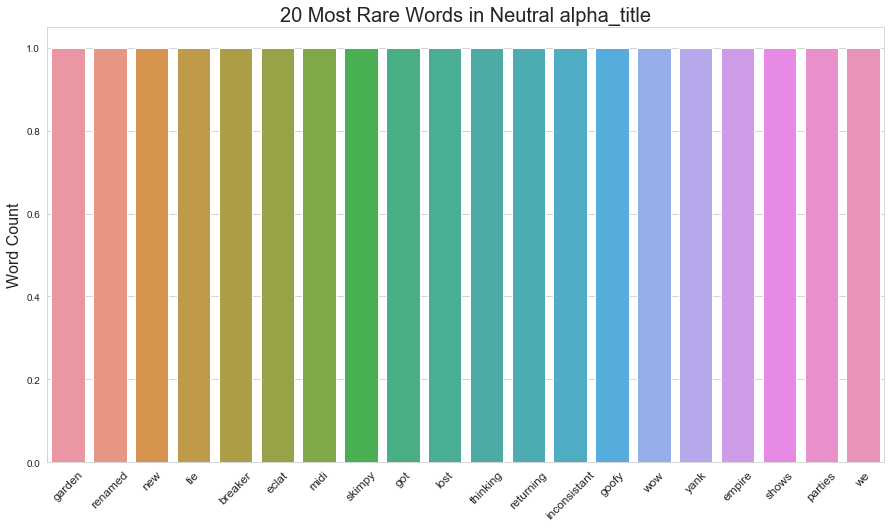

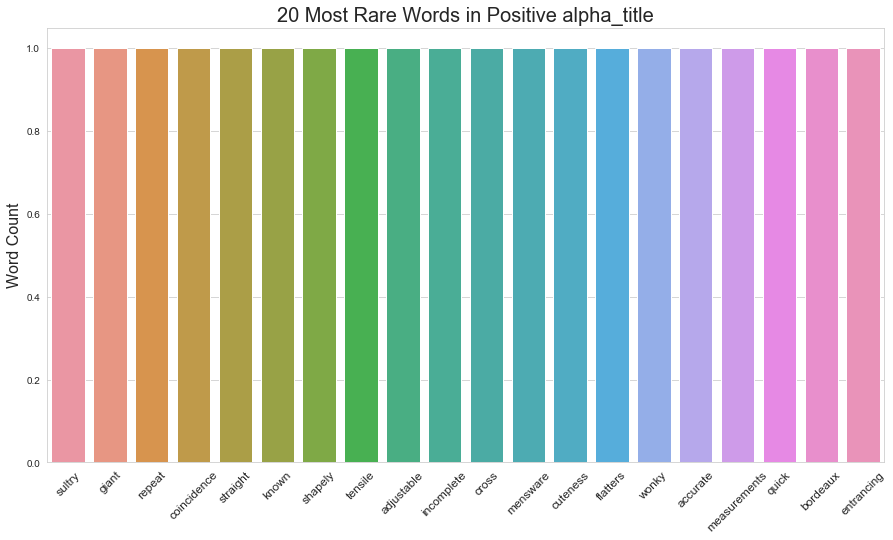

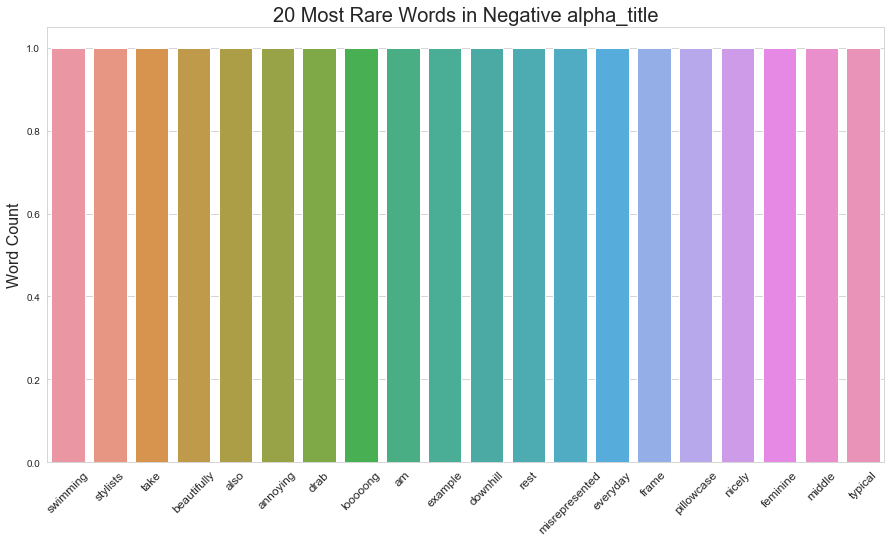

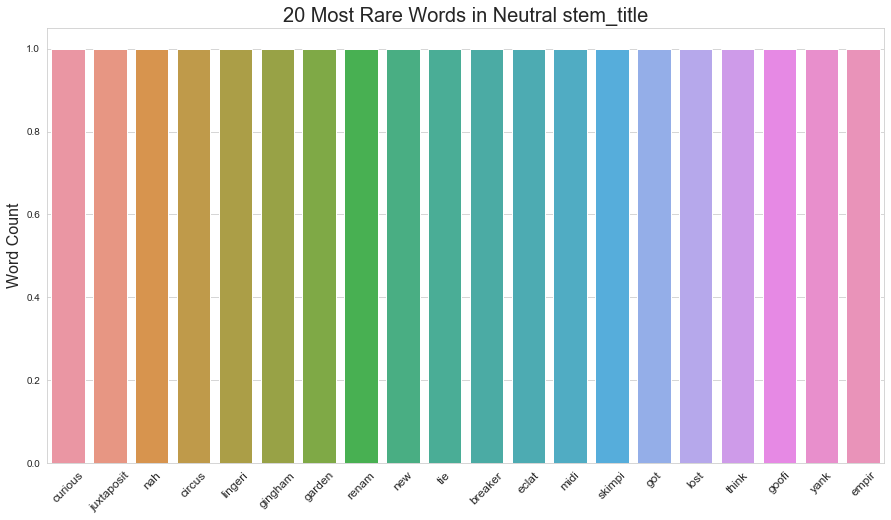

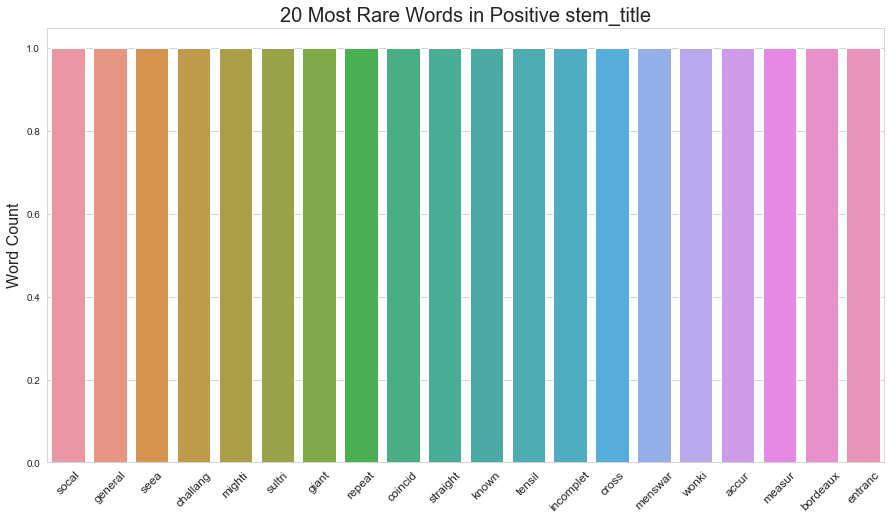

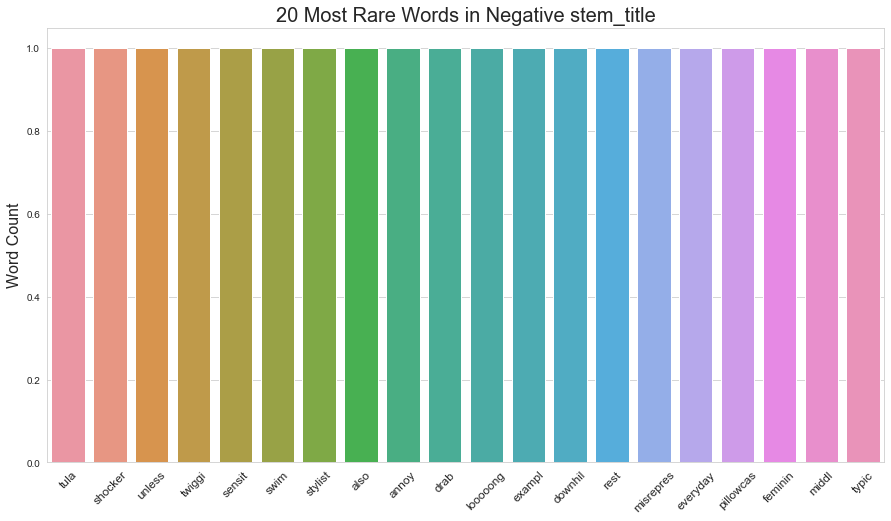

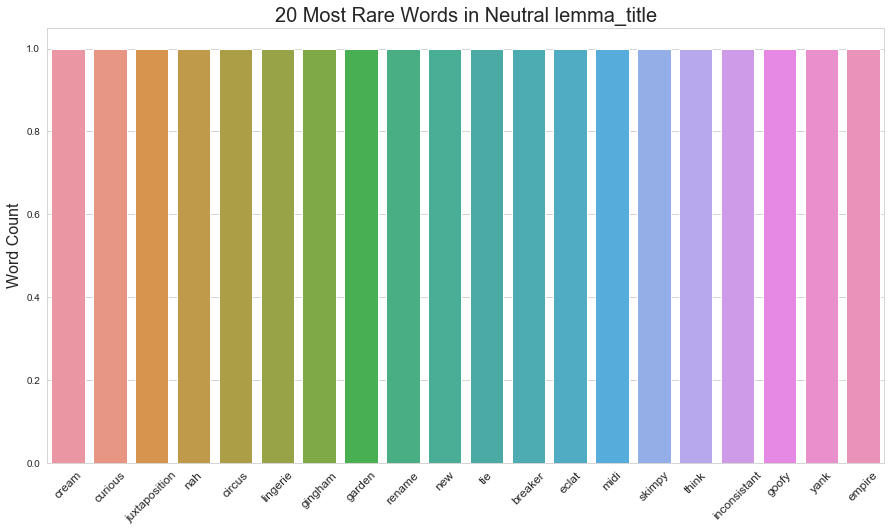

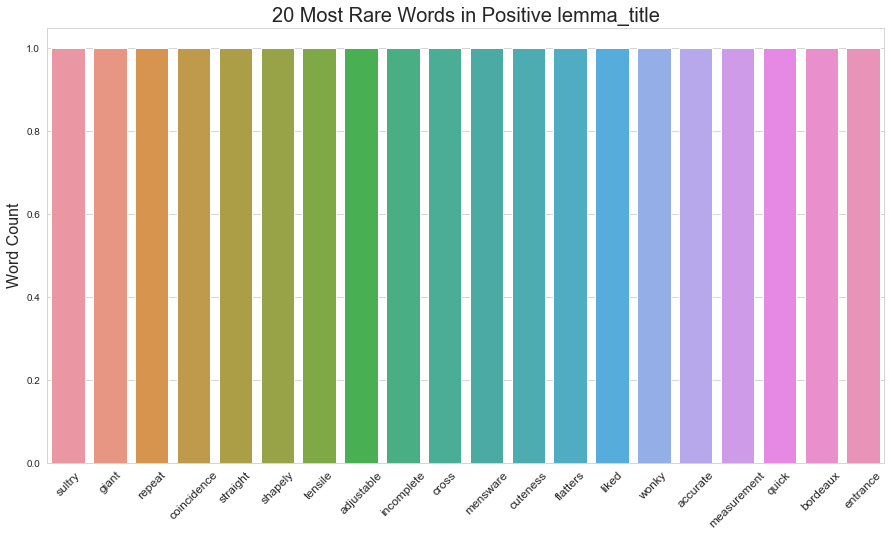

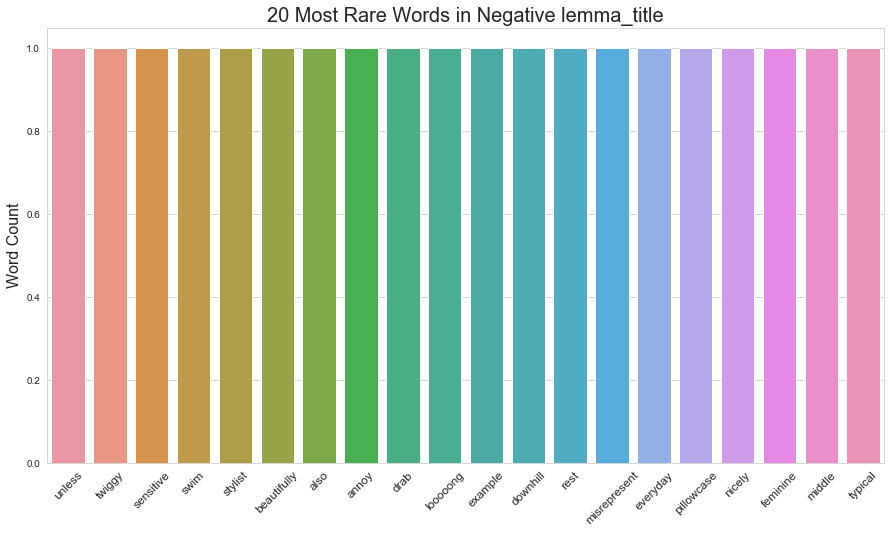

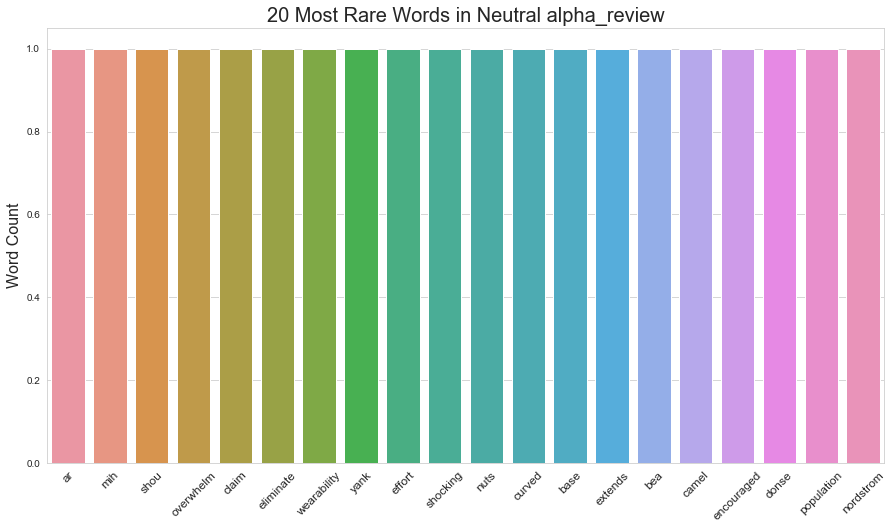

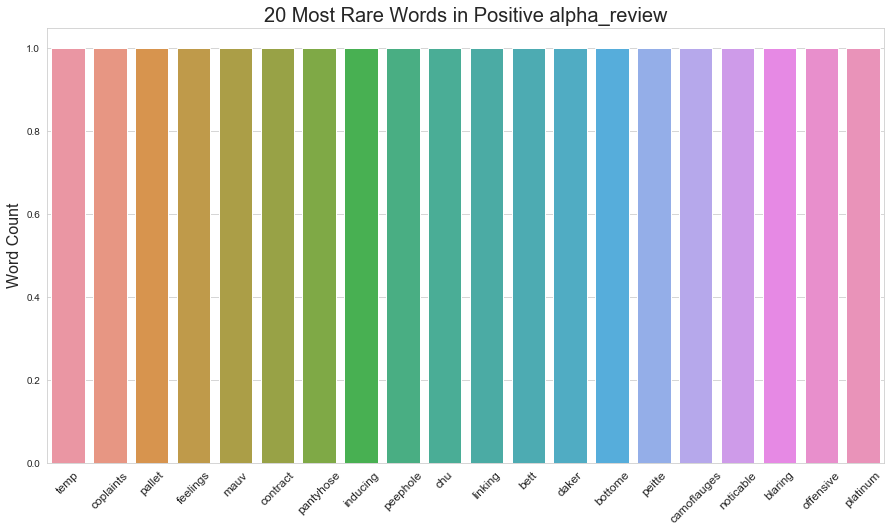

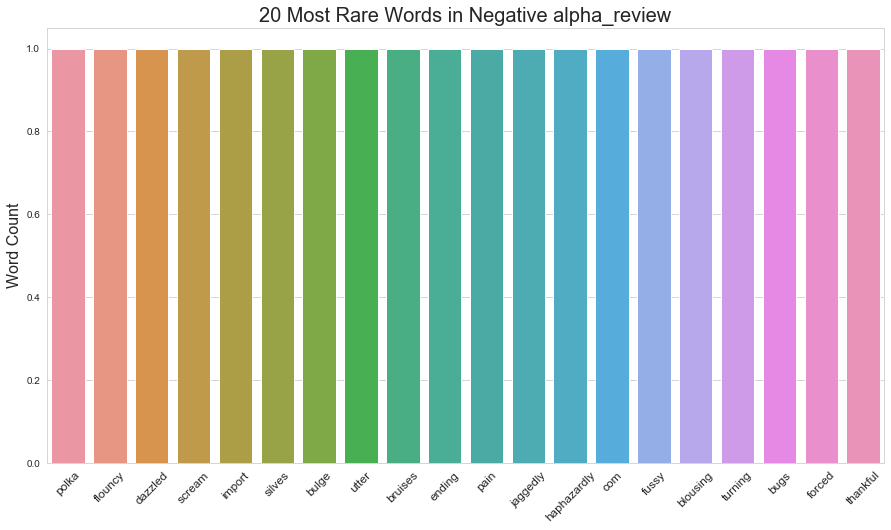

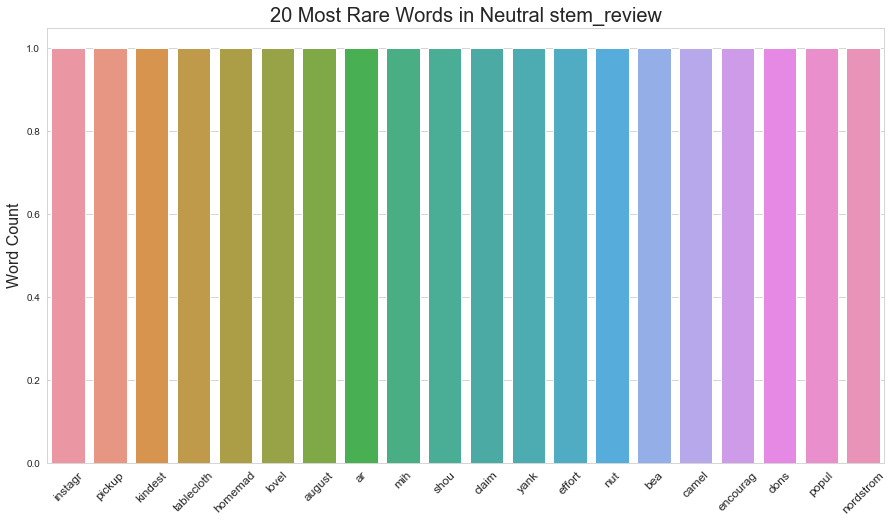

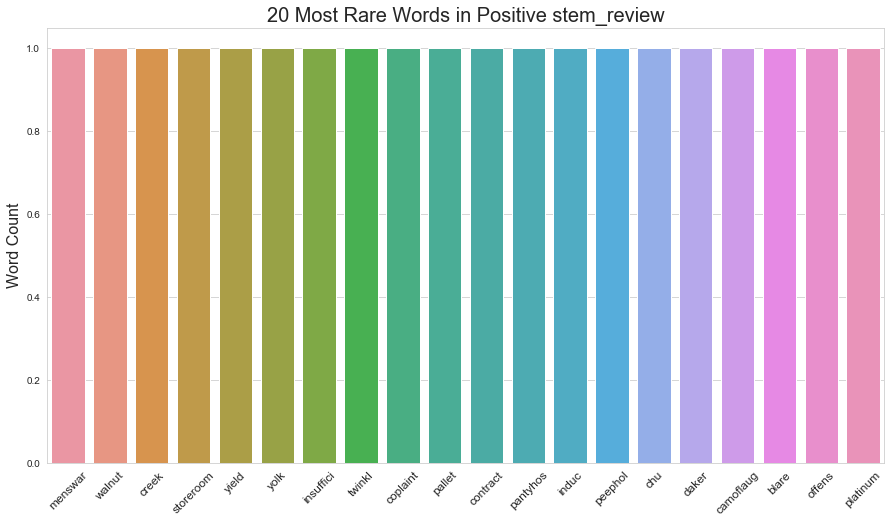

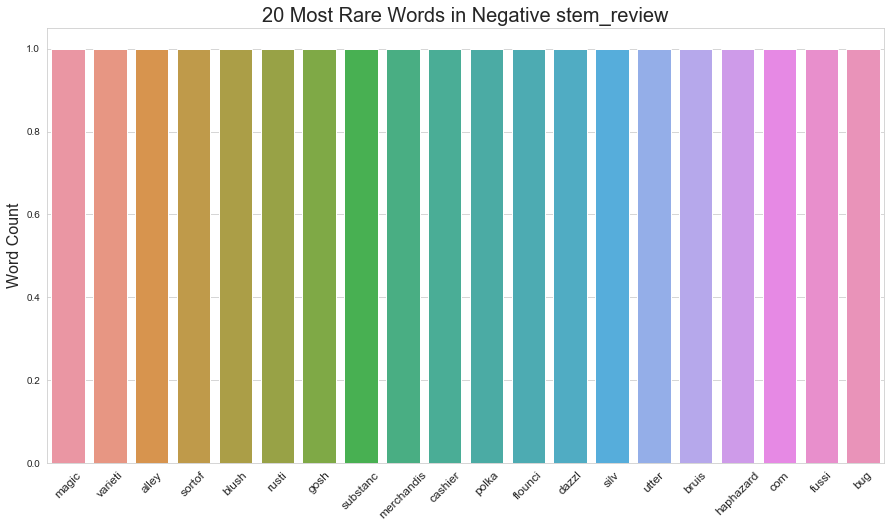

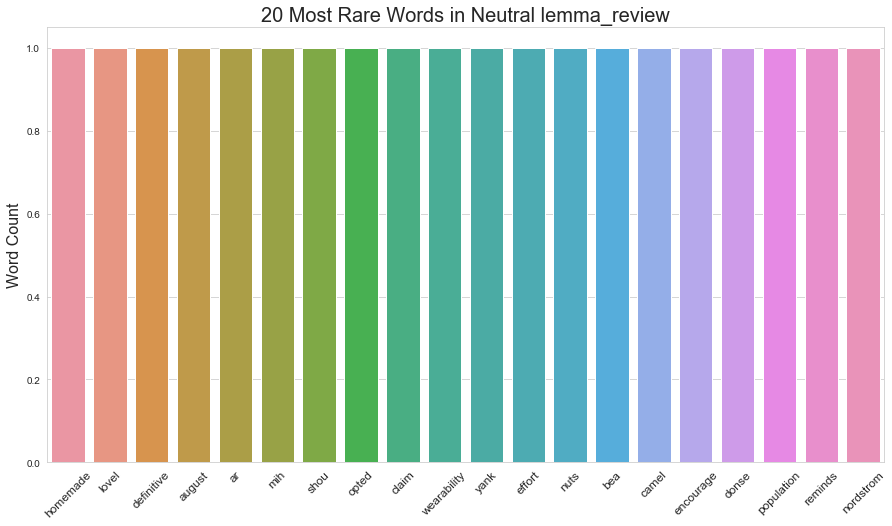

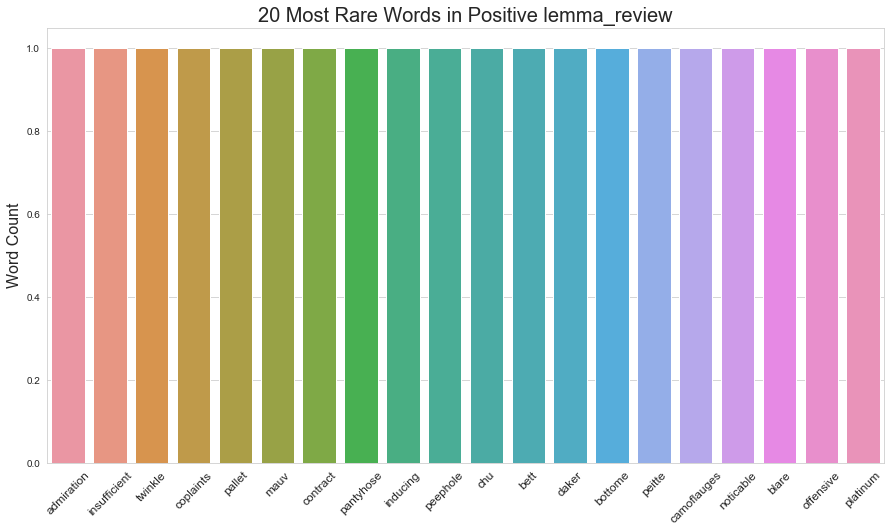

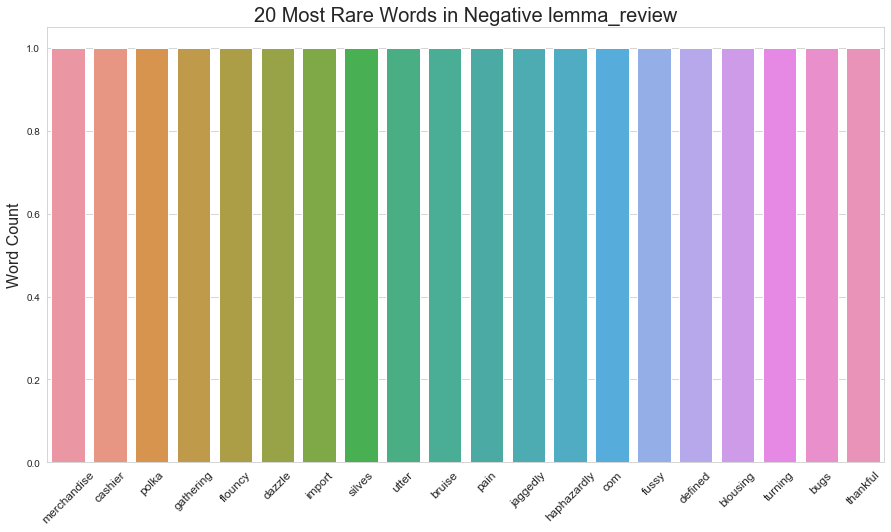

In [56]:
for col in ['alpha_title', 'stem_title', 'lemma_title', 'alpha_review', 'stem_review', 'lemma_review']:
    for sentiment in df_sentiment['Sentiment'].unique():
        show_most_word(sentiment, col ,number=20, n_grams=1, common=False)

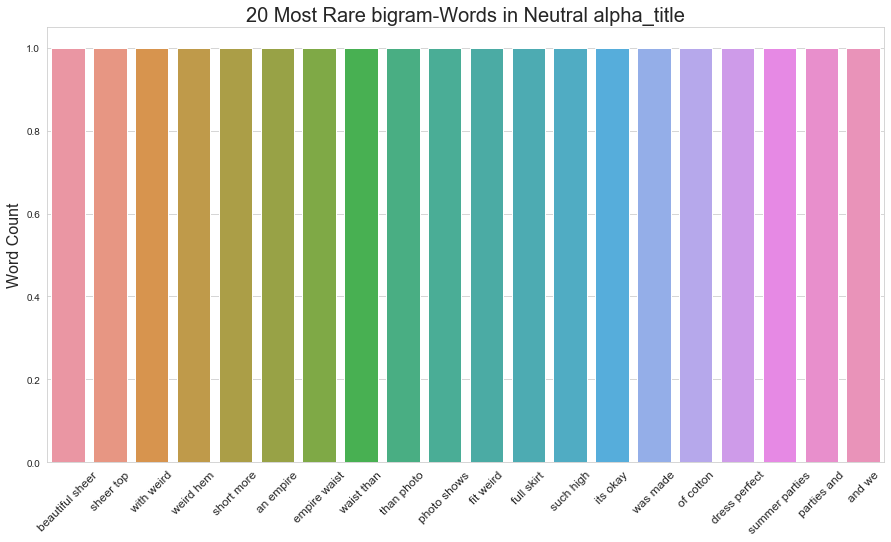

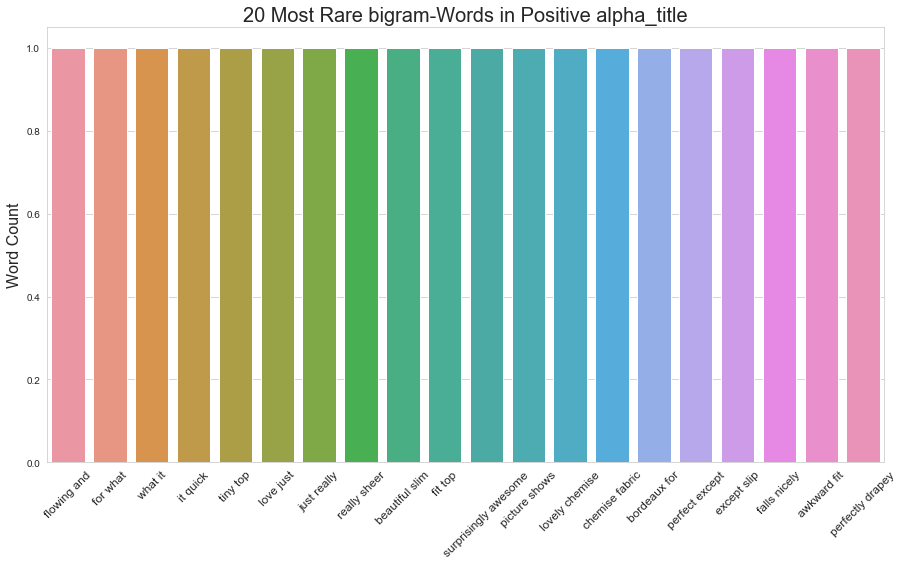

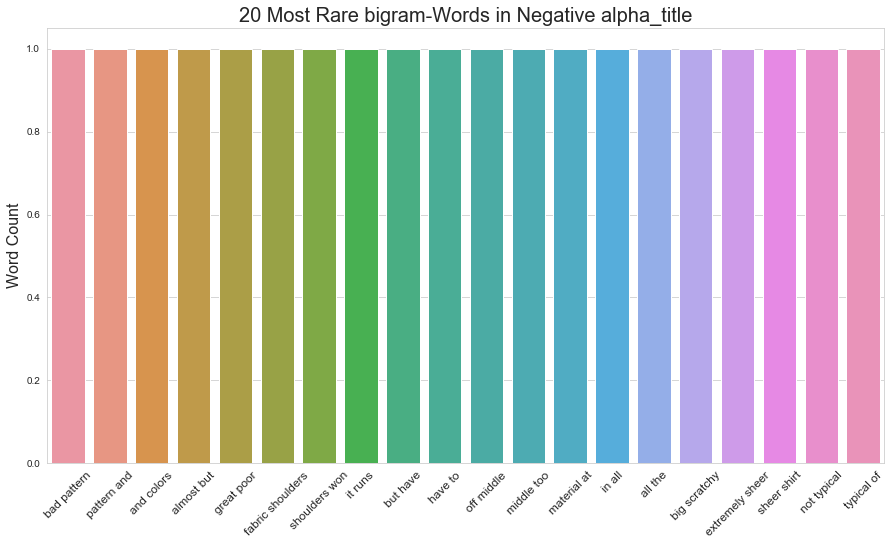

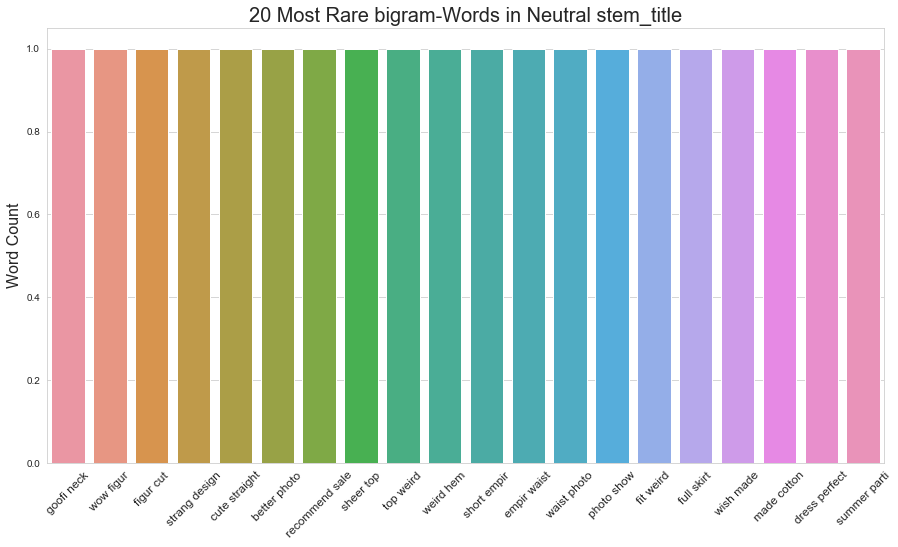

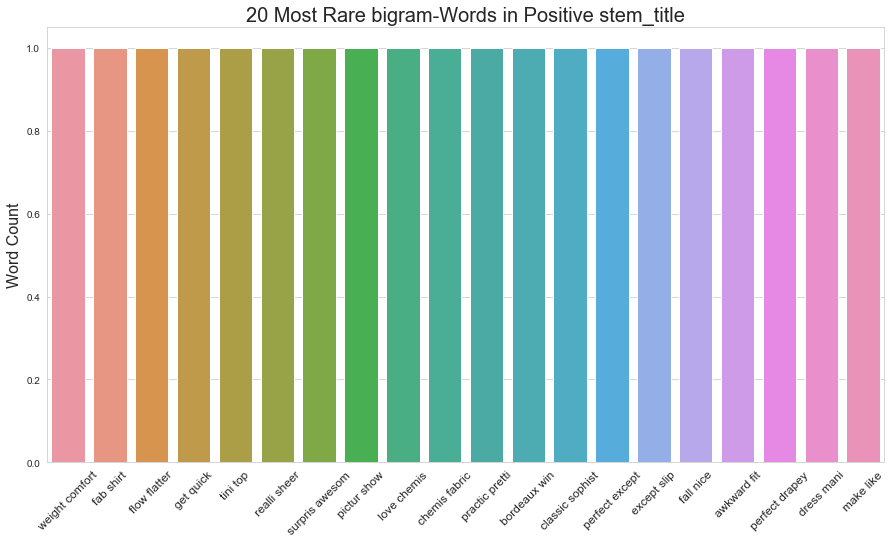

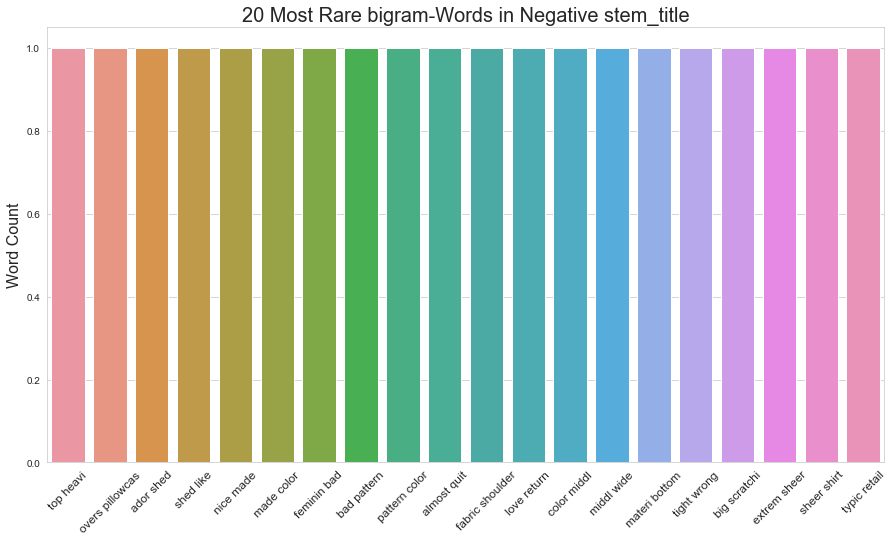

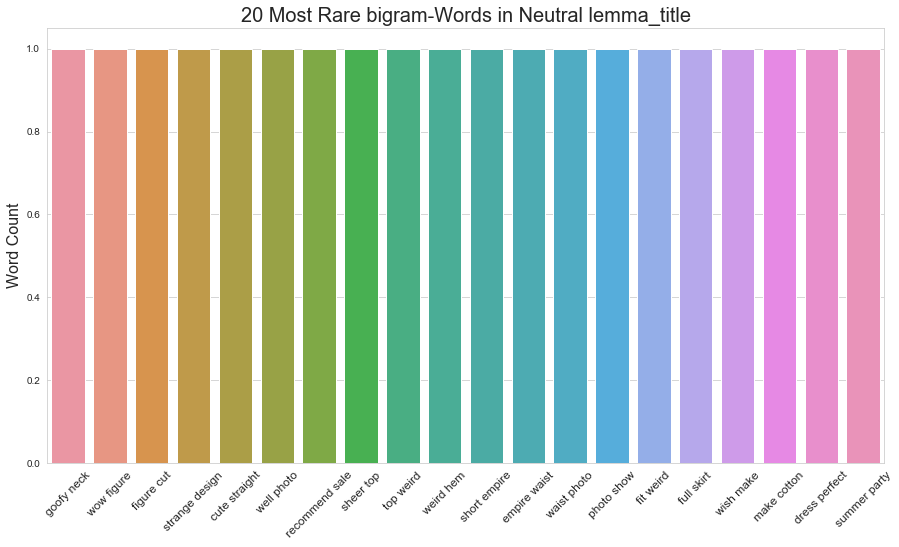

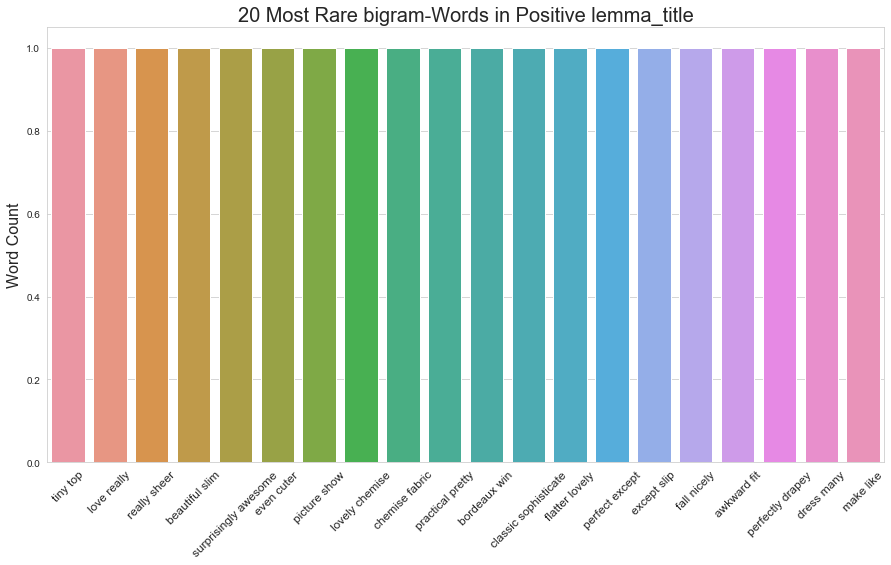

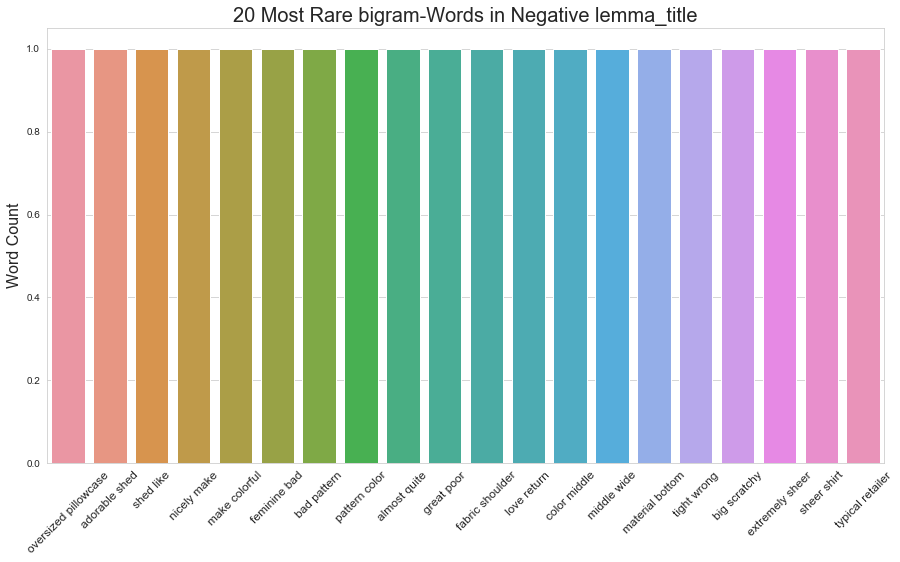

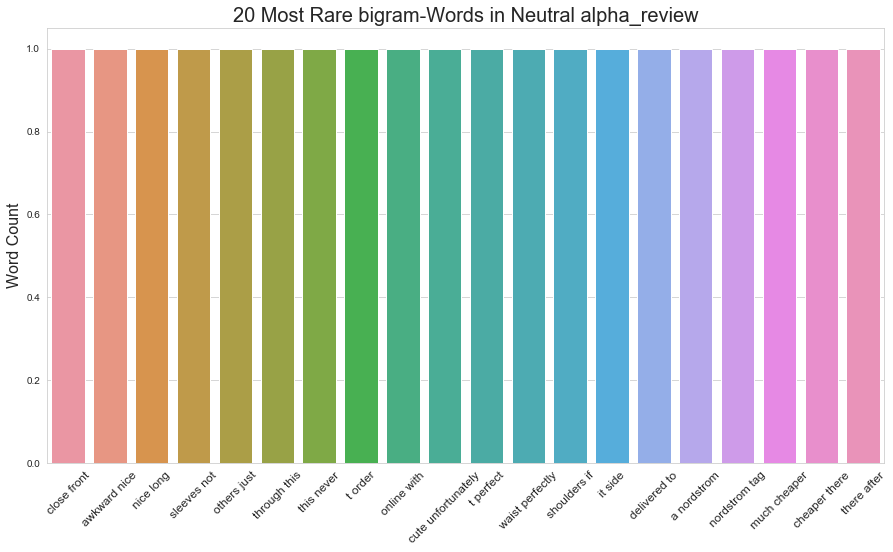

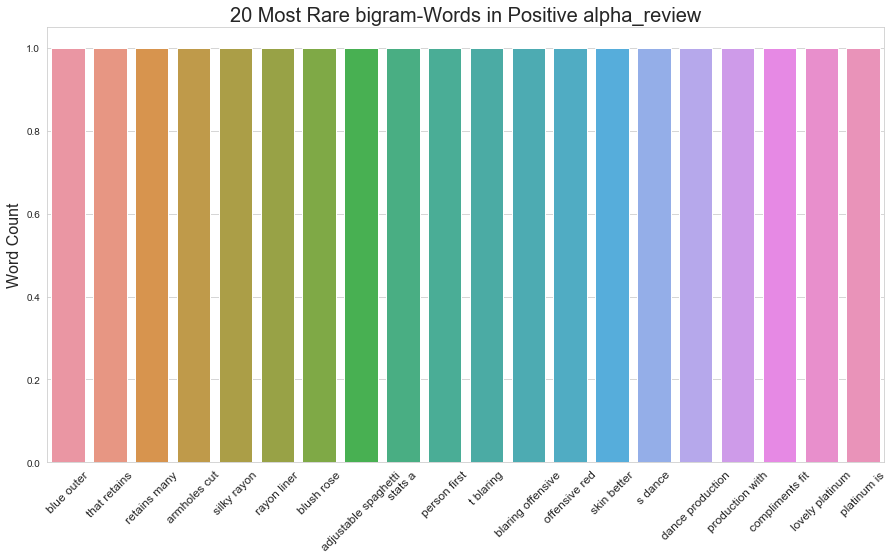

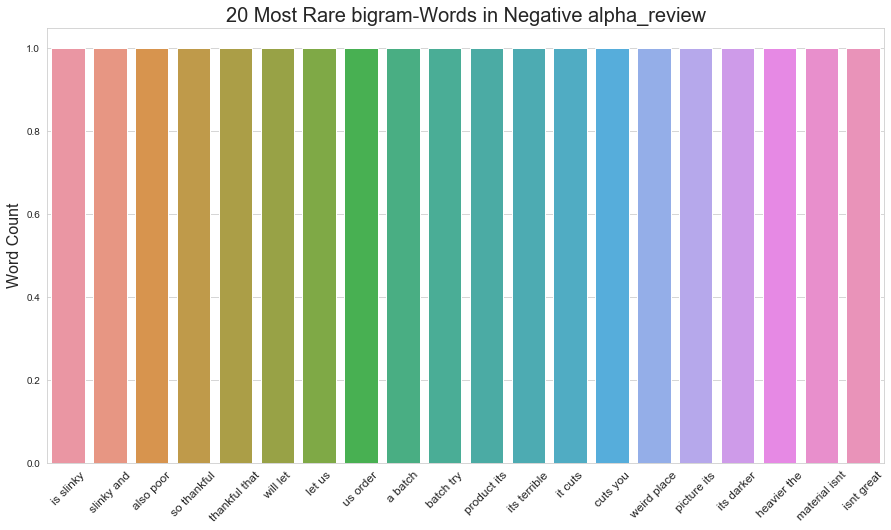

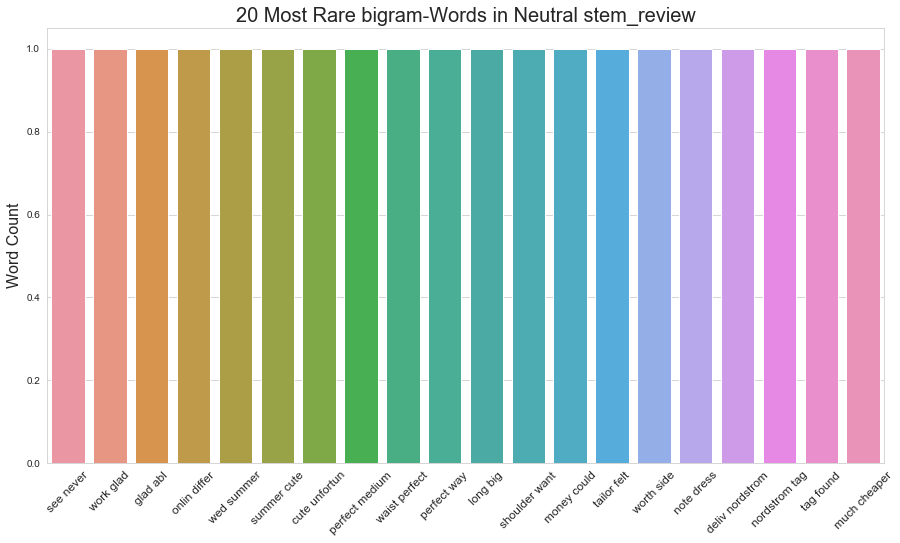

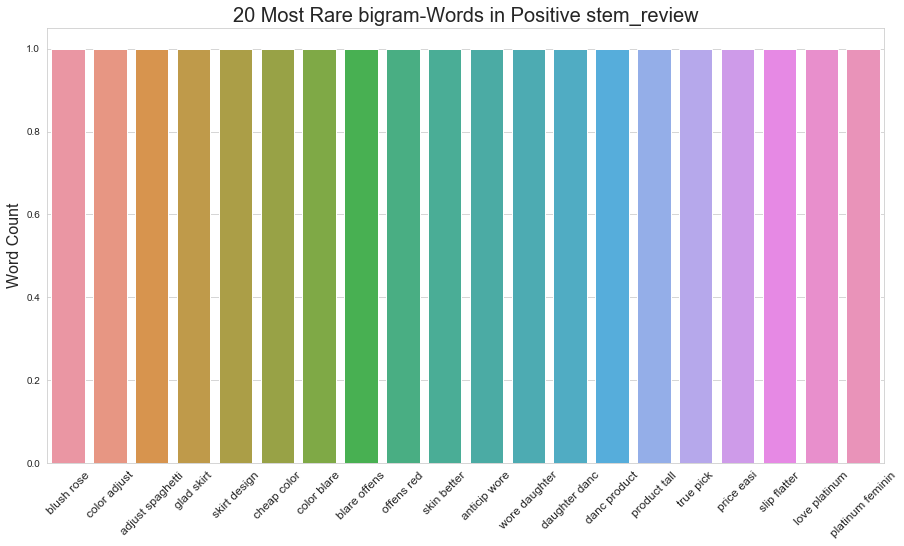

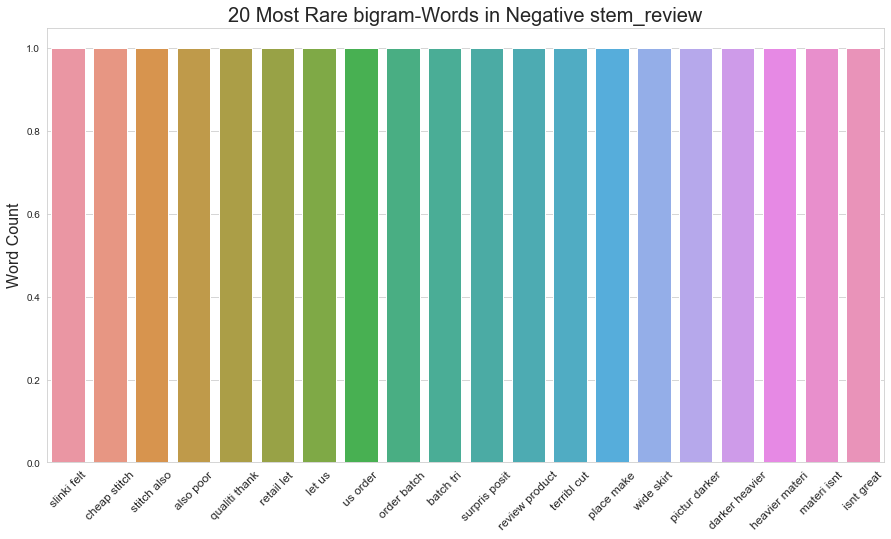

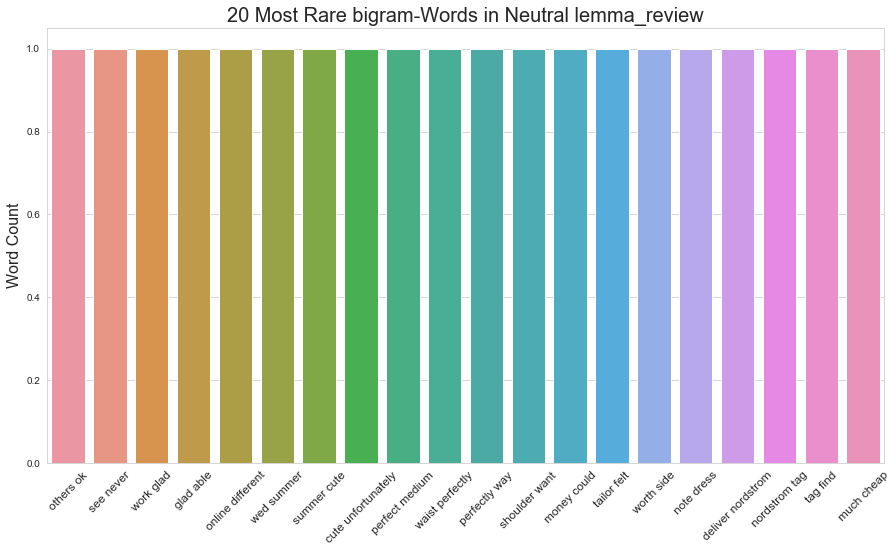

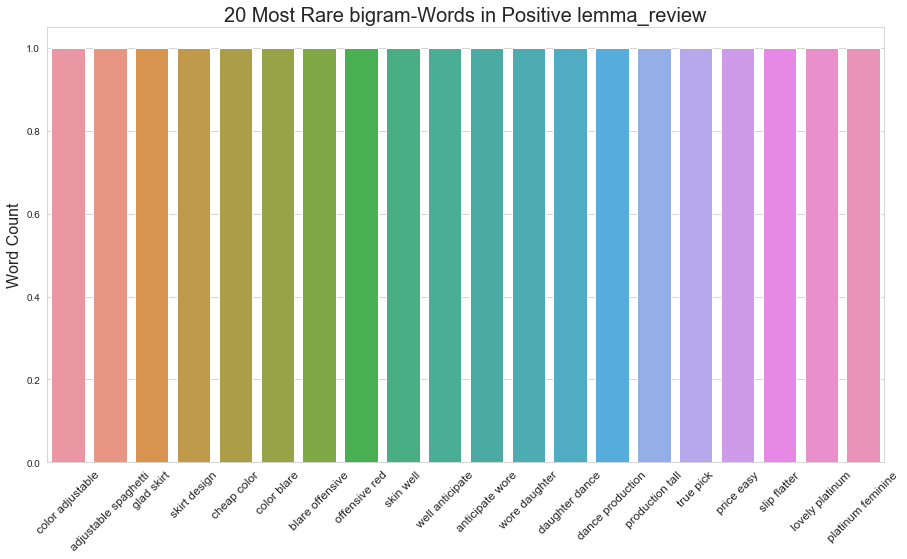

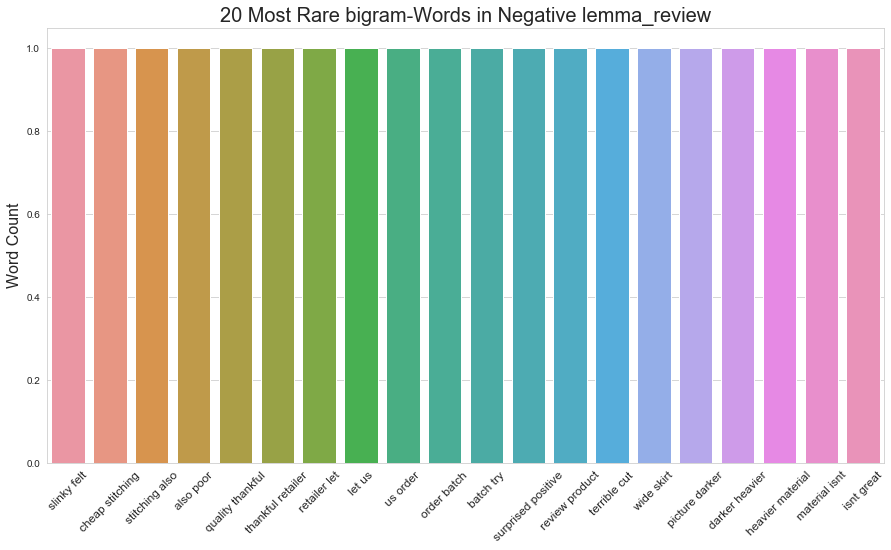

In [57]:
for col in ['alpha_title', 'stem_title', 'lemma_title', 'alpha_review', 'stem_review', 'lemma_review']:   
    for sentiment in df_sentiment['Sentiment'].unique():
        show_most_word(sentiment, col ,number=20, n_grams=2, common=False)

In [49]:
df_cleaned = df_sentiment.copy()
df_cleaned = df_cleaned[['alpha_title', 'stem_title', 'lemma_title', 'alpha_review', 'stem_review', 'lemma_review']]
df_cleaned['alpha_combination'] = df_cleaned[['alpha_title', 'alpha_review']].apply(lambda x: (x['alpha_title'] + ' ' + x['alpha_review']), axis=1)
df_cleaned['stem_combination'] = df_cleaned[['stem_title', 'stem_review']].apply(lambda x: (x['stem_title'] + ' ' + x['stem_review']), axis=1)
df_cleaned['lemma_combination'] = df_cleaned[['lemma_title', 'lemma_review']].apply(lambda x: (x['lemma_title'] + ' ' + x['lemma_review']), axis=1)
df_cleaned['Sentiment'] = df_sentiment['Sentiment'].copy()
df_cleaned['Sentiment'] = df_cleaned['Sentiment'].map({'Positive': 2, 'Neutral': 1, 'Negative': 0})
df_cleaned.reset_index(inplace=True, drop=True)

In [50]:
df_cleaned.head()

alpha_title            stem_title           lemma_title  \
0  some major design flaws     major design flaw     major design flaw   
1         my favorite buy            favorit buy          favorite buy   
2         flattering shirt         flatter shirt         flatter shirt   
3  not for the very petite                 petit                petite   
4     cagrcoal shimmer fun  cagrcoal shimmer fun  cagrcoal shimmer fun   

                                        alpha_review  \
0  i had such high hopes for this dress and reall...   
1  i love  love  love this jumpsuit  it s fun  fl...   
2  this shirt is very flattering to all due to th...   
3  i love tracy reese dresses  but this one is no...   
4  i aded this in my basket at hte last mintue to...   

                                         stem_review  \
0  high hope dress realli want work initi order p...   
1  love love love jumpsuit fun flirti fabul everi...   
2  shirt flatter due adjust front tie perfect len...   
3  love traci rees dress one petit feet tall usua...   
4  ade basket hte last mintu see would look like ...   

                                        lemma_review  \
0  high hope dress really wanted work initially o...   
1  love love love jumpsuit fun flirty fabulous ev...   
2  shirt flatter due adjustable front tie perfect...   
3  love tracy reese dress one petite foot tall us...   
4  aded basket hte last mintue see would look lik...   

                                   alpha_combination  \
0  some major design flaws i had such high hopes ...   
1  my favorite buy  i love  love  love this jumps...   
2  flattering shirt this shirt is very flattering...   
3  not for the very petite i love tracy reese dre...   
4  cagrcoal shimmer fun i aded this in my basket ...   

                                    stem_combination  \
0  major design flaw high hope dress realli want ...   
1  favorit buy love love love jumpsuit fun flirti...   
2  flatter shirt shirt flatter due adjust front t...   
3  petit love traci rees dress one petit feet tal...   
4  cagrcoal shimmer fun ade basket hte last mintu...   

                                   lemma_combination  Sentiment  
0  major design flaw high hope dress really wante...          1  
1  favorite buy love love love jumpsuit fun flirt...          2  
2  flatter shirt shirt flatter due adjustable fro...          2  
3  petite love tracy reese dress one petite foot ...          0  
4  cagrcoal shimmer fun aded basket hte last mint...          2

In [52]:
import pickle
pickle.dump(df_cleaned, open('sentiment_words.sav', 'wb'))
pickle.dump(df_length, open('sentiment_length.sav', 'wb'))